<a href="https://colab.research.google.com/github/devreborges/projetos_analise_dados/blob/main/An%C3%A1lise_microdados_enem_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando o dataframe micro_dados_enem e realizando tratamento preliminar.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('MICRODADOS_ENEM_2023.csv',sep=';', encoding='latin1')
display(df)

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210059085136,2023,14,M,2,1,1,1,17,1,...,C,C,B,B,A,B,B,A,A,B
1,210059527735,2023,12,M,2,1,0,1,16,1,...,B,A,B,B,A,A,C,A,D,B
2,210061103945,2023,6,F,1,1,1,1,0,1,...,B,A,A,B,A,A,A,A,A,B
3,210060214087,2023,2,F,1,3,1,2,0,2,...,A,A,A,B,A,A,D,A,A,B
4,210059980948,2023,3,F,1,3,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11178,210059458417,2023,2,M,1,3,1,2,0,2,...,A,A,A,B,A,A,C,A,A,B
11179,210061042511,2023,12,F,2,3,2,1,0,1,...,A,A,A,B,A,A,B,A,A,A
11180,210058816790,2023,9,F,1,2,1,2,0,2,...,A,A,A,B,A,A,C,A,A,B
11181,210059785920,2023,3,F,1,1,1,2,0,2,...,A,A,A,B,A,A,B,A,A,A


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11183 entries, 0 to 11182
Data columns (total 76 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NU_INSCRICAO            11183 non-null  int64  
 1   NU_ANO                  11183 non-null  int64  
 2   TP_FAIXA_ETARIA         11183 non-null  int64  
 3   TP_SEXO                 11183 non-null  object 
 4   TP_ESTADO_CIVIL         11183 non-null  int64  
 5   TP_COR_RACA             11183 non-null  int64  
 6   TP_NACIONALIDADE        11183 non-null  int64  
 7   TP_ST_CONCLUSAO         11183 non-null  int64  
 8   TP_ANO_CONCLUIU         11183 non-null  int64  
 9   TP_ESCOLA               11183 non-null  int64  
 10  TP_ENSINO               3427 non-null   float64
 11  IN_TREINEIRO            11183 non-null  int64  
 12  CO_MUNICIPIO_ESC        1869 non-null   float64
 13  NO_MUNICIPIO_ESC        1869 non-null   object 
 14  CO_UF_ESC               1869 non-null 

In [4]:
df["TP_FAIXA_ETARIA"].value_counts()

TP_FAIXA_ETARIA
3     2700
4     1586
2     1538
5      968
11     863
6      655
7      491
8      429
12     429
9      342
1      294
13     258
10     230
14     197
15      92
16      66
17      28
18      13
19       4
Name: count, dtype: int64

In [5]:
# Convertendo para string se necessário (caso os valores sejam numéricos)
df["TP_FAIXA_ETARIA"] = df["TP_FAIXA_ETARIA"].astype(str)

# Dicionário de mapeamento dos valores
mapeamento_f_etaria = {
    "1": "Menor de 17 anos",
    "2": "17 anos",
    "3": "18 anos",
    "4": "19 anos",
    "5": "20 anos",
    "6": "21 anos",
    "7": "22 anos",
    "8": "23 anos",
    "9": "24 anos",
    "10": "25 anos",
    "11": "Entre 26 e 30 anos",
    "12": "Entre 31 e 35 anos",
    "13": "Entre 36 e 40 anos",
    "14": "Entre 41 e 45 anos",
    "15": "Entre 46 e 50 anos",
    "16": "Entre 51 e 55 anos",
    "17": "Entre 56 e 60 anos",
    "18": "Entre 61 e 65 anos",
    "19": "Entre 66 e 70 anos",
    "20": "Maior de 70 anos"
}

# Aplicando a substituição
df["TP_FAIXA_ETARIA"] = df["TP_FAIXA_ETARIA"].replace(mapeamento_f_etaria)


In [6]:
df["TP_FAIXA_ETARIA"].value_counts()

TP_FAIXA_ETARIA
18 anos               2700
19 anos               1586
17 anos               1538
20 anos                968
Entre 26 e 30 anos     863
21 anos                655
22 anos                491
23 anos                429
Entre 31 e 35 anos     429
24 anos                342
Menor de 17 anos       294
Entre 36 e 40 anos     258
25 anos                230
Entre 41 e 45 anos     197
Entre 46 e 50 anos      92
Entre 51 e 55 anos      66
Entre 56 e 60 anos      28
Entre 61 e 65 anos      13
Entre 66 e 70 anos       4
Name: count, dtype: int64

In [7]:
# Convertendo para string se necessário (caso os valores sejam numéricos)
df["TP_ESTADO_CIVIL"] = df["TP_ESTADO_CIVIL"].astype(str)

# Dicionário de mapeamento dos valores
mapeamento_estado_civil = {
    "0": "Não informado",
    "1": "Solteiro(a)",
    "2": "Casado(a)/Mora com companheiro(a)",
    "3": "Divorciado(a)/Desquitado(a)/Separado(a)",
    "4": "Viúvo(a)"
}

# Aplicando a substituição
df["TP_ESTADO_CIVIL"] = df["TP_ESTADO_CIVIL"].replace(mapeamento_estado_civil)
df["TP_ESTADO_CIVIL"].value_counts()

TP_ESTADO_CIVIL
Solteiro(a)                                10007
Casado(a)/Mora com companheiro(a)            580
Não informado                                414
Divorciado(a)/Desquitado(a)/Separado(a)      169
Viúvo(a)                                      13
Name: count, dtype: int64

In [8]:
# Convertendo para string se necessário (caso os valores sejam numéricos)
df["TP_COR_RACA"] = df["TP_COR_RACA"].astype(str)

# Dicionário de mapeamento dos valores
mapeamento_cor_raca = {
    "0": "Não declarado",
    "1": "Branca",
    "2": "Preta",
    "3": "Parda",
    "4": "Amarela",
    "5": "Indígena",
    "6": "Não dispõe da informação"
}

# Aplicando a substituição
df["TP_COR_RACA"] = df["TP_COR_RACA"].replace(mapeamento_cor_raca)
df["TP_COR_RACA"] .value_counts()


TP_COR_RACA
Parda            5292
Branca           3813
Preta            1727
Amarela           182
Não declarado     112
Indígena           57
Name: count, dtype: int64

In [9]:
df["TP_ST_CONCLUSAO"] = df["TP_ST_CONCLUSAO"].astype(str)

mapeamento_conclusao_EM = {
    "1": "Já concluí o Ensino Médio",
    "2": "Estou cursando e concluirei o Ensino Médio em 2023",
    "3": "Estou cursando e concluirei o Ensino Médio após 2023",
    "4": "Não concluí e não estou cursando o Ensino Médio",

}
df["TP_ST_CONCLUSAO"] = df["TP_ST_CONCLUSAO"].replace(mapeamento_conclusao_EM)

df['TP_ST_CONCLUSAO'].value_counts()

TP_ST_CONCLUSAO
Já concluí o Ensino Médio                               6910
Estou cursando e concluirei o Ensino Médio em 2023      3552
Estou cursando e concluirei o Ensino Médio após 2023     695
Não concluí e não estou cursando o Ensino Médio           26
Name: count, dtype: int64

In [10]:
df["TP_ANO_CONCLUIU"] = df["TP_ANO_CONCLUIU"].astype(str)

mapeamento_ano_concluiu_EM = {
    '0': 'Não informado',
    '1': '2022',
    '2': '2021',
    '3': '2020',
    '4': '2019',
    '5': '2018',
    '6': '2017',
    '7': '2016',
    '8': '2015',
    '9': '2014',
    '10': '2013',
    '11': '2012',
    '12': '2011',
    '13': '2010',
    '14': '2009',
    '15': '2008',
    '16': '2007',
    '17': 'Antes de 2007'
}

df["TP_ANO_CONCLUIU"] = df["TP_ANO_CONCLUIU"].replace(mapeamento_ano_concluiu_EM)

df['TP_ANO_CONCLUIU'].value_counts()

TP_ANO_CONCLUIU
Não informado    5106
2022             1773
2021             1025
2019              510
2020              506
Antes de 2007     418
2018              354
2017              322
2016              205
2015              193
2014              144
2013              137
2012              122
2011               90
2010               85
2009               83
2008               56
2007               54
Name: count, dtype: int64

In [11]:
df["TP_ESCOLA"] = df["TP_ESCOLA"].astype(str)

map_tipo_escola ={
    '1':'Não Respondeu',
    '2':'Pública',
    '3': 'Privada'
}
df["TP_ESCOLA"] = df["TP_ESCOLA"].replace(map_tipo_escola)
df['TP_ESCOLA'].value_counts()


TP_ESCOLA
Não Respondeu    7631
Pública          3439
Privada           113
Name: count, dtype: int64

In [12]:
#Removendo do dataframe alunos que faltaram a alguma prova ou foram eliminadas.
# Verifica se as colunas estão presentes no DataFrame
cols = ['TP_PRESENCA_CN', 'TP_PRESENCA_CH', 'TP_PRESENCA_LC', 'TP_PRESENCA_MT']
if all(col in df.columns for col in cols):
    # Filtra as linhas onde todas essas colunas têm valor diferente de 0 e 2
    df = df[~((df['TP_PRESENCA_CN'].isin([0, 2])) |
              (df['TP_PRESENCA_CH'].isin([0, 2])) |
              (df['TP_PRESENCA_LC'].isin([0, 2])) |
              (df['TP_PRESENCA_MT'].isin([0, 2])))]
else:
    print("Algumas colunas especificadas não existem no DataFrame.")

In [13]:
df['TP_PRESENCA_CN'].value_counts()

TP_PRESENCA_CN
1    8152
Name: count, dtype: int64

In [14]:
df.reset_index(inplace=True)
display(df)

,index,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,2,210061103945,2023,21 anos,F,Solteiro(a),Branca,1,Já concluí o Ensino Médio,Não informado,...,B,A,A,B,A,A,A,A,A,B
1,3,210060214087,2023,17 anos,F,Solteiro(a),Parda,1,Estou cursando e concluirei o Ensino Médio em ...,Não informado,...,A,A,A,B,A,A,D,A,A,B
2,4,210059980948,2023,18 anos,F,Solteiro(a),Parda,1,Estou cursando e concluirei o Ensino Médio em ...,Não informado,...,A,A,A,B,A,A,B,A,A,A
3,9,210060801601,2023,Entre 26 e 30 anos,M,Solteiro(a),Branca,1,Já concluí o Ensino Médio,2015,...,B,A,B,C,B,A,C,A,B,B
4,10,210059085130,2023,23 anos,M,Solteiro(a),Parda,1,Já concluí o Ensino Médio,2018,...,B,A,B,B,A,A,E,A,B,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8147,11176,210058478076,2023,25 anos,M,Solteiro(a),Branca,1,Já concluí o Ensino Médio,Não informado,...,B,A,A,B,A,A,C,A,B,B
8148,11177,210060749618,2023,20 anos,F,Solteiro(a),Parda,1,Já concluí o Ensino Médio,Não informado,...,B,A,A,B,B,A,B,A,A,B
8149,11179,210061042511,2023,Entre 31 e 35 anos,F,Casado(a)/Mora com companheiro(a),Parda,2,Já concluí o Ensino Médio,Não informado,...,A,A,A,B,A,A,B,A,A,A
8150,11181,210059785920,2023,18 anos,F,Solteiro(a),Branca,1,Estou cursando e concluirei o Ensino Médio em ...,Não informado,...,A,A,A,B,A,A,B,A,A,A


# Tratanto outliers


In [15]:
# Calcula a média, mediana e moda das notas
medias = df[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mean()
medianas = df[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].median()
modas = df[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mode().iloc[0]  # mode() retorna um DataFrame

# Exibe os resultados
print("Média das notas:")
print(medias)
print("\nMediana das notas:")
print(medianas)
print("\nModa das notas:")
print(modas)

Média das notas:
NU_NOTA_REDACAO    655.090173
NU_NOTA_CN         492.092431
NU_NOTA_CH         531.175147
NU_NOTA_LC         521.814095
NU_NOTA_MT         520.008660
dtype: float64

Mediana das notas:
NU_NOTA_REDACAO    640.0
NU_NOTA_CN         489.1
NU_NOTA_CH         537.4
NU_NOTA_LC         525.1
NU_NOTA_MT         505.5
dtype: float64

Moda das notas:
NU_NOTA_REDACAO    600.0
NU_NOTA_CN           0.0
NU_NOTA_CH         492.5
NU_NOTA_LC         557.1
NU_NOTA_MT           0.0
Name: 0, dtype: float64


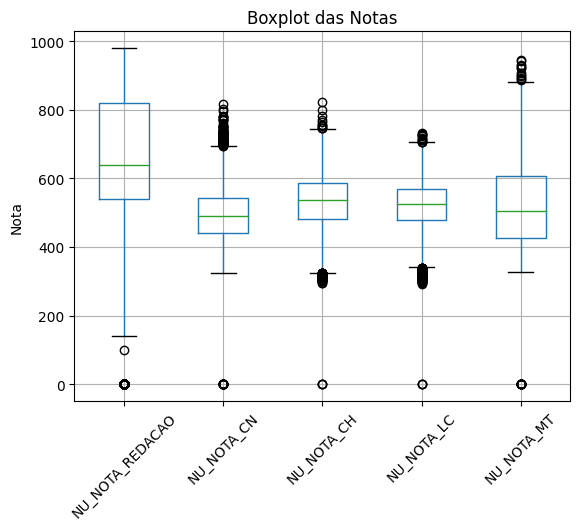

In [16]:
df[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].boxplot()
plt.title('Boxplot das Notas')
plt.ylabel('Nota')
plt.xticks(rotation=45)
plt.show()

In [17]:
def tratar_outliers(df, col_names):
    df_filtrado = df.copy()  # Criar uma cópia do DataFrame para não modificar o original

    for col_name in col_names:
        Q1 = df[col_name].quantile(0.25)
        Q3 = df[col_name].quantile(0.75)
        IQR = Q3 - Q1

        # Limites para identificação de outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filtrando valores dentro dos limites
        df_filtrado = df_filtrado[(df_filtrado[col_name] >= lower_bound) & (df_filtrado[col_name] <= upper_bound)]

    return df_filtrado

# Lista das colunas alvo
colunas_alvo = ['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']

# Aplicar tratamento de outliers
df_sem_outliers = tratar_outliers(df, colunas_alvo)

# Exemplo de uso:
print("Número de linhas após remover outliers:", len(df_sem_outliers))

Número de linhas após remover outliers: 7741


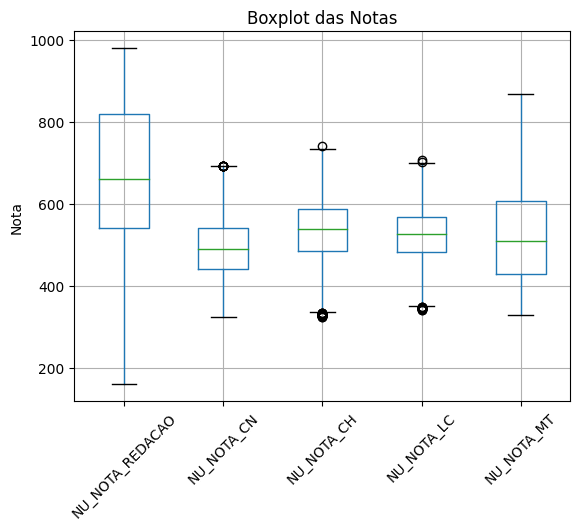

In [18]:
df_sem_outliers[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].boxplot()
plt.title('Boxplot das Notas')
plt.ylabel('Nota')
plt.xticks(rotation=45)
plt.show()

In [19]:
df_sem_outliers_2 = tratar_outliers(df_sem_outliers, colunas_alvo)

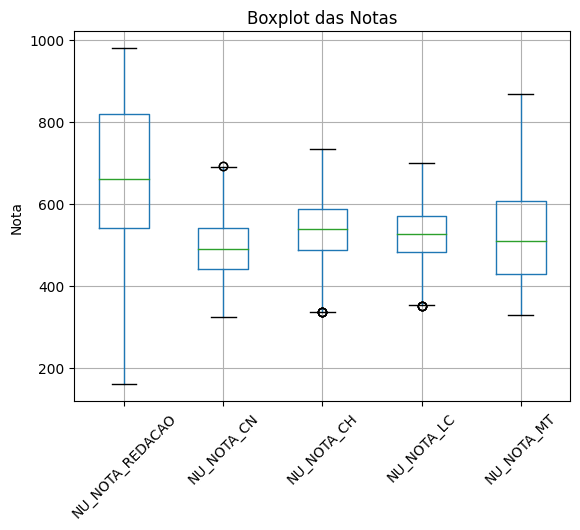

In [20]:
df_sem_outliers_2[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].boxplot()
plt.title('Boxplot das Notas')
plt.ylabel('Nota')
plt.xticks(rotation=45)
plt.show()

In [21]:
df_sem_outliers_3 = tratar_outliers(df_sem_outliers_2, colunas_alvo)

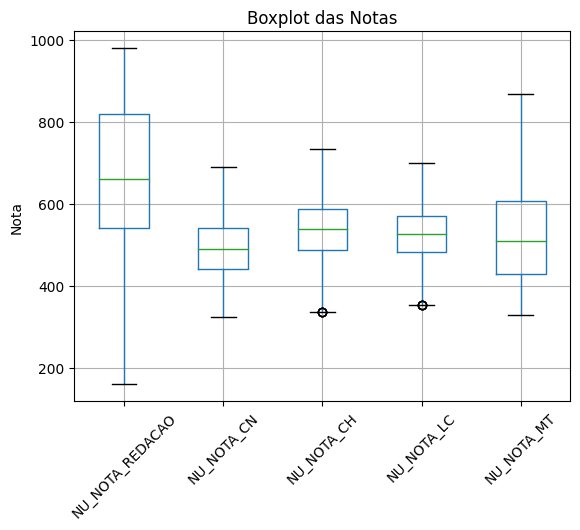

In [22]:
df_sem_outliers_3[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].boxplot()
plt.title('Boxplot das Notas')
plt.ylabel('Nota')
plt.xticks(rotation=45)
plt.show()

In [23]:
len(df_sem_outliers_3)

7675

In [24]:
# Calcula as estatísticas das notas
medias = df_sem_outliers_3[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mean()
medianas = df_sem_outliers_3[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].median()
modas = df_sem_outliers_3[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mode().iloc[0]  # mode() retorna um DataFrame
minimas = df_sem_outliers_3[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].min()
maximas = df_sem_outliers_3[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].max()

# Exibe os resultados
print("Estatísticas das notas:")
print("Média das notas:")
print(medias)
print("\nMediana das notas:")
print(medianas)
print("\nModa das notas:")
print(modas)

Estatísticas das notas:
Média das notas:
NU_NOTA_REDACAO    669.735505
NU_NOTA_CN         493.189629
NU_NOTA_CH         534.743309
NU_NOTA_LC         525.243648
NU_NOTA_MT         521.590697
dtype: float64

Mediana das notas:
NU_NOTA_REDACAO    660.0
NU_NOTA_CN         490.7
NU_NOTA_CH         539.8
NU_NOTA_LC         527.3
NU_NOTA_MT         509.0
dtype: float64

Moda das notas:
NU_NOTA_REDACAO    600.0
NU_NOTA_CN         557.8
NU_NOTA_CH         492.5
NU_NOTA_LC         557.1
NU_NOTA_MT         492.0
Name: 0, dtype: float64


In [25]:
df_sem_outliers_3.drop(columns=['index'], inplace=True)
df_sem_outliers_3.head()

,NU_INSCRICAO,NU_ANO,TP_FAIXA_ETARIA,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,210061103945,2023,21 anos,F,Solteiro(a),Branca,1,Já concluí o Ensino Médio,Não informado,Não Respondeu,...,B,A,A,B,A,A,A,A,A,B
1,210060214087,2023,17 anos,F,Solteiro(a),Parda,1,Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,...,A,A,A,B,A,A,D,A,A,B
2,210059980948,2023,18 anos,F,Solteiro(a),Parda,1,Estou cursando e concluirei o Ensino Médio em ...,Não informado,Pública,...,A,A,A,B,A,A,B,A,A,A
3,210060801601,2023,Entre 26 e 30 anos,M,Solteiro(a),Branca,1,Já concluí o Ensino Médio,2015,Não Respondeu,...,B,A,B,C,B,A,C,A,B,B
4,210059085130,2023,23 anos,M,Solteiro(a),Parda,1,Já concluí o Ensino Médio,2018,Não Respondeu,...,B,A,B,B,A,A,E,A,B,B


# Gerando insights dos dados de participantes que realizaram a prova, não faltaram a nenhum exame e não foram desclassificados.

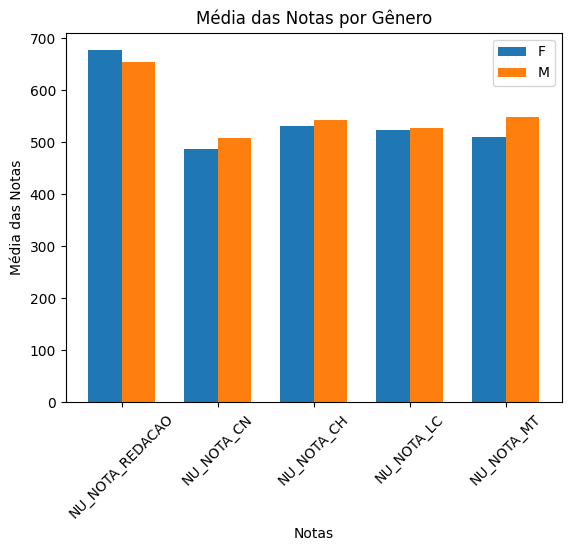

In [26]:
# Agrupar por nota e por gênero e calcular médias
notas_por_genero = df_sem_outliers_3.groupby('TP_SEXO')[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].mean()

# Configurações para o gráfico
labels = ['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']
generos = ['F', 'M']
x = range(len(labels))
width = 0.35

# Criar figura e eixos
fig, ax = plt.subplots()

# Plotar barras
for i, genero in enumerate(generos):
    ax.bar([pos + i * width for pos in x], notas_por_genero.loc[genero], width, label=genero)

# Configurar eixos e legendas
ax.set_xlabel('Notas')
ax.set_ylabel('Média das Notas')
ax.set_title('Média das Notas por Gênero')
ax.set_xticks([pos + width / 2 for pos in x])
ax.set_xticklabels(labels)
ax.legend()

plt.xticks(rotation=45)
plt.show()

 A meninas lideram a média das notas em redação, enquanto os meninos lideram a média das notas de matemática e naturezas.

 Em humanas e linguagens os gêneros estão virtualmente empatados.

---


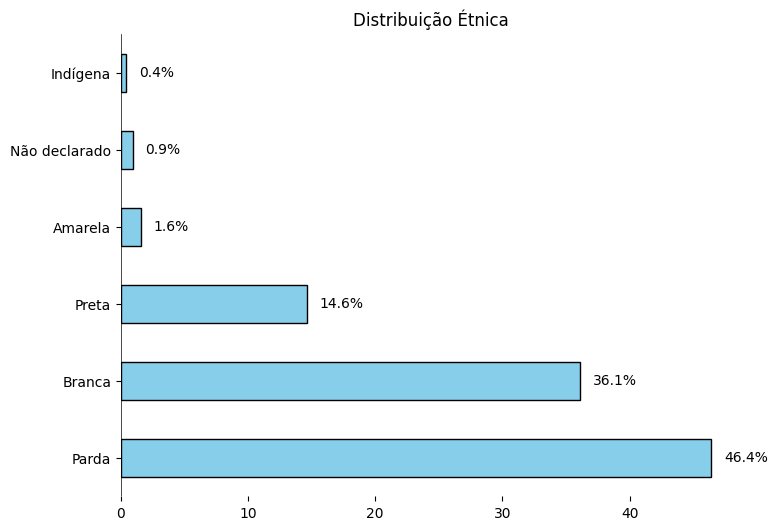

In [27]:
# Contagem de valores únicos na coluna TP_COR_RACA
contagem_etnias_geral = df_sem_outliers_3['TP_COR_RACA'].value_counts()

# Calcula as porcentagens
porcentagens = contagem_etnias_geral / contagem_etnias_geral.sum() * 100

# Configuração do gráfico de barras
plt.figure(figsize=(8, 6))  # Ajusta o tamanho da figura (opcional)
bars = porcentagens.plot(kind='barh', color='skyblue', edgecolor='black')  # Plota o gráfico de barras horizontal

# Adiciona as porcentagens nos rótulos das barras
for i, porcentagem in enumerate(porcentagens):
    plt.text(porcentagem + 1, i, f'{porcentagem:.1f}%', va='center')

# Configurações adicionais
plt.title('Distribuição Étnica')
plt.ylabel('')


# Remove os limites do gráfico
plt.box(False)

# Adiciona as linhas do plano cartesiano
plt.axvline(0, color='black', linewidth=0.5)

# Exibe o gráfico de barras
plt.show()

Aproximadamente 84% dos candidados se declaram como brancos ou pardos.

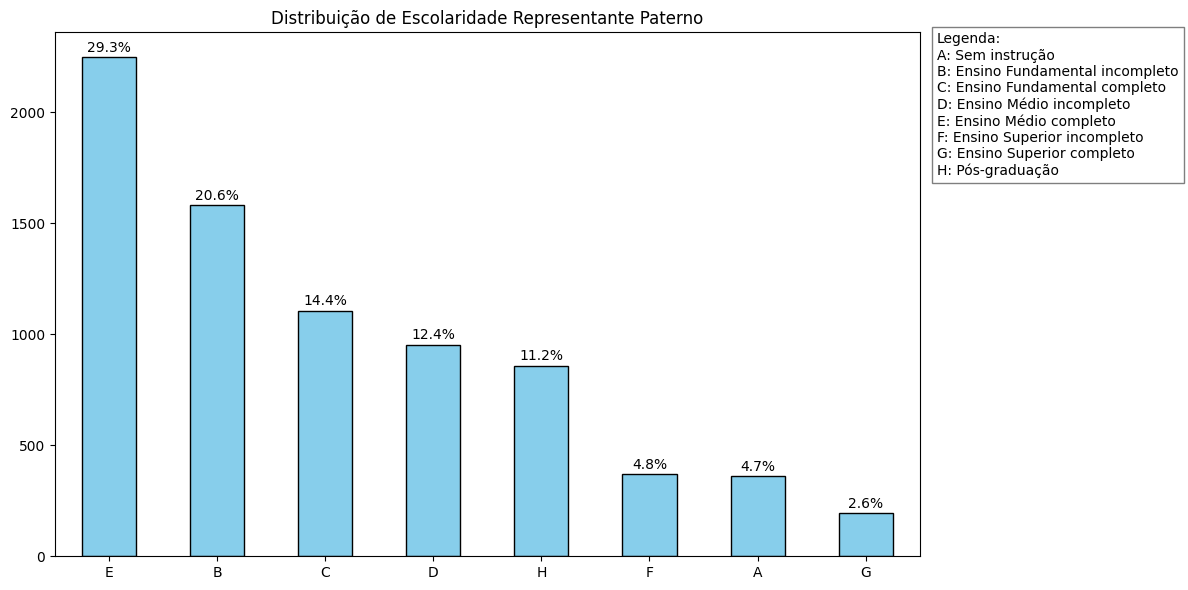

In [28]:
# Suponha que descricoes esteja definido como um dicionário
descricoes = {
    'A': 'Sem instrução',
    'B': 'Ensino Fundamental incompleto',
    'C': 'Ensino Fundamental completo',
    'D': 'Ensino Médio incompleto',
    'E': 'Ensino Médio completo',
    'F': 'Ensino Superior incompleto',
    'G': 'Ensino Superior completo',
    'H': 'Pós-graduação'
}

# Calcula a porcentagem de cada valor em relação ao total
contagem_escolaridade_pai = df_sem_outliers_3['Q001'].value_counts()
total = contagem_escolaridade_pai.sum()
porcentagens = [(valor / total) * 100 for valor in contagem_escolaridade_pai]

# Configuração do gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura (opcional)
bars = contagem_escolaridade_pai.plot(kind='bar', color='skyblue', edgecolor='black')  # Plota o gráfico de barras

# Adiciona os valores em porcentagem nos rótulos das barras
for i, percentual in enumerate(porcentagens):
    plt.text(i, contagem_escolaridade_pai[i] + 10, f'{percentual:.1f}%', ha='center', va='bottom')

# Configurações da legenda como bloco
legenda_texto = '\n'.join([f'{codigo}: {descricao}' for codigo, descricao in descricoes.items()])
plt.text(1.02, 1.00, f'Legenda:\n{legenda_texto}', transform=plt.gca().transAxes, fontsize=10, va='top', bbox=dict(facecolor='white', alpha=0.5))

# Configurações adicionais
plt.title('Distribuição de Escolaridade Representante Paterno')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)  # Rótulos do eixo x na horizontal

# Exibe o gráfico de barras
plt.tight_layout()
plt.show()

Pelo menos 76% dos representantes paternos dos candidatos não completaram a faculdade.



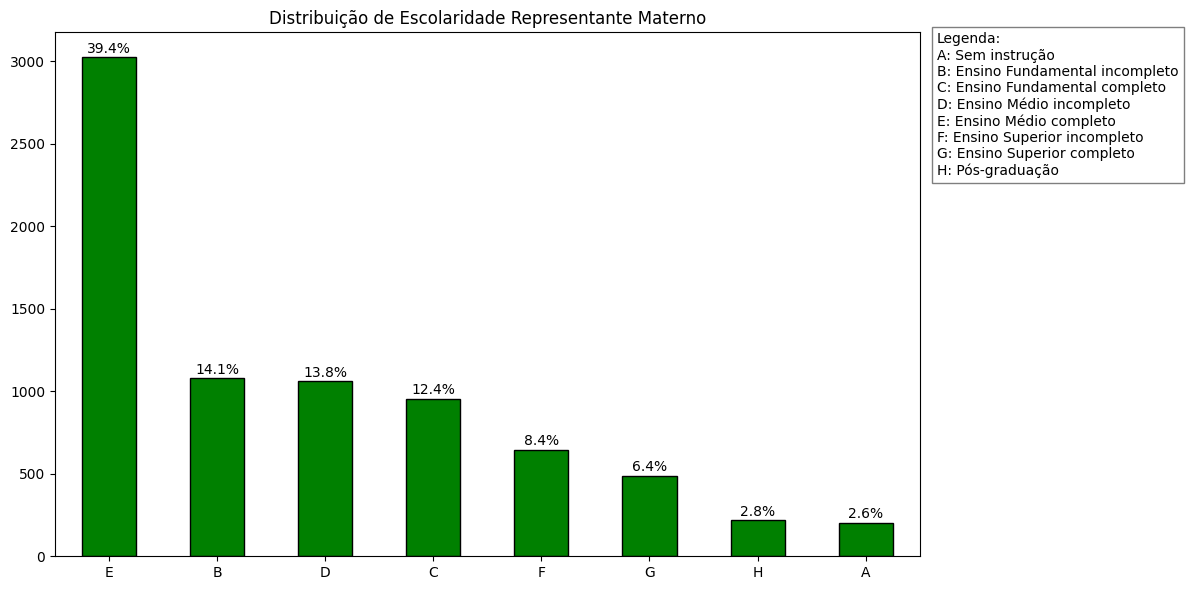

In [29]:
# Calcula a porcentagem de cada valor em relação ao total
contagem_escolaridade_mae = df_sem_outliers_3['Q002'].value_counts()
total = contagem_escolaridade_mae.sum()
porcentagens = [(valor / total) * 100 for valor in contagem_escolaridade_mae]

# Configuração do gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura (opcional)
bars = contagem_escolaridade_mae.plot(kind='bar', color='green', edgecolor='black')  # Plota o gráfico de barras

# Adiciona os valores em porcentagem nos rótulos das barras
for i, percentual in enumerate(porcentagens):
    plt.text(i, contagem_escolaridade_mae[i] + 10, f'{percentual:.1f}%', ha='center', va='bottom')

# Configurações da legenda como bloco
legenda_texto = '\n'.join([f'{codigo}: {descricao}' for codigo, descricao in descricoes.items()])
plt.text(1.02, 1.00, f'Legenda:\n{legenda_texto}', transform=plt.gca().transAxes, fontsize=10, va='top', bbox=dict(facecolor='white', alpha=0.5))

# Configurações adicionais
plt.title('Distribuição de Escolaridade Representante Materno')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)  # Rótulos do eixo x na horizontal

# Exibe o gráfico de barras
plt.tight_layout()
plt.show()

Pelo menos 76% dos representantes maternos dos candidatos não completaram a faculdade.

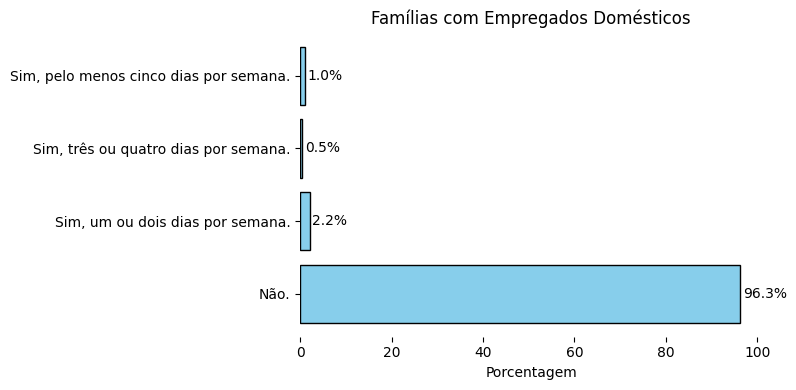

In [30]:
# Mapeamento das descrições para as categorias Q007
descricoes_q007 = {
    'A': 'Não.',
    'B': 'Sim, um ou dois dias por semana.',
    'C': 'Sim, três ou quatro dias por semana.',
    'D': 'Sim, pelo menos cinco dias por semana.',
}

# Ajustando a ordem das categorias para o histograma
ordem_q007 = ['A', 'B', 'C', 'D']

# Calculando as frequências
contagem_q007 = df_sem_outliers_3['Q007'].value_counts()
total = contagem_q007.sum()
porcentagens_q007 = [(contagem_q007[cat] / total) * 100 for cat in ordem_q007]

# Criando o gráfico de barras horizontais
plt.figure(figsize=(8, 4))  # Ajusta o tamanho da figura
bars = plt.barh(range(len(ordem_q007)), porcentagens_q007, align='center', color='skyblue', edgecolor='black')

# Adicionando os valores numéricos em porcentagem ao lado de cada barra
for i, valor in enumerate(porcentagens_q007):
    plt.text(valor + 0.5, i, f'{valor:.1f}%', ha='left', va='center')

# Adicionando rótulos ao eixo y
plt.yticks(range(len(ordem_q007)), [descricoes_q007[cat] for cat in ordem_q007])

# Adicionando título e rótulos aos eixos
plt.title('Famílias com Empregados Domésticos')
plt.xlabel('Porcentagem')
plt.ylabel('')

# Removendo as bordas dos eixos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Exibindo o gráfico de barras horizontais
plt.tight_layout()
plt.show()


Aproximadamente 93% dos candidatos não contam com empregadas domésticas.

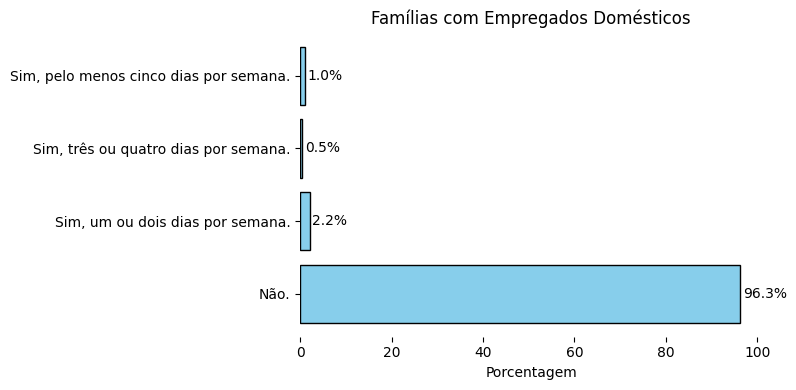

In [31]:
# Mapeamento das descrições para as categorias Q007
descricoes_q007 = {
    'A': 'Não.',
    'B': 'Sim, um ou dois dias por semana.',
    'C': 'Sim, três ou quatro dias por semana.',
    'D': 'Sim, pelo menos cinco dias por semana.',
}

# Ajustando a ordem das categorias para o histograma
ordem_q007 = ['A', 'B', 'C', 'D']

# Calculando as frequências
contagem_q007 = df_sem_outliers_3['Q007'].value_counts()
total = contagem_q007.sum()
porcentagens_q007 = [(contagem_q007[cat] / total) * 100 for cat in ordem_q007]

# Criando o gráfico de barras horizontais
plt.figure(figsize=(8, 4))  # Ajusta o tamanho da figura
bars = plt.barh(range(len(ordem_q007)), porcentagens_q007, align='center', color='skyblue', edgecolor='black')

# Adicionando os valores numéricos em porcentagem ao lado de cada barra
for i, valor in enumerate(porcentagens_q007):
    plt.text(valor + 0.5, i, f'{valor:.1f}%', ha='left', va='center')

# Adicionando rótulos ao eixo y
plt.yticks(range(len(ordem_q007)), [descricoes_q007[cat] for cat in ordem_q007])

# Adicionando título e rótulos aos eixos
plt.title('Famílias com Empregados Domésticos')
plt.xlabel('Porcentagem')
plt.ylabel('')

# Removendo as bordas dos eixos
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

# Exibindo o gráfico de barras horizontais
plt.tight_layout()
plt.show()


In [32]:
#retonar a análise daqui com 2 gráficos : Renda familiar e quantidade de pessoas que moram na mesma residência.
#valendo um kit kat, segundo moisés quanto menos pessoas morando em uma residência, maior a nota no enem.
#uma caixa da garoto

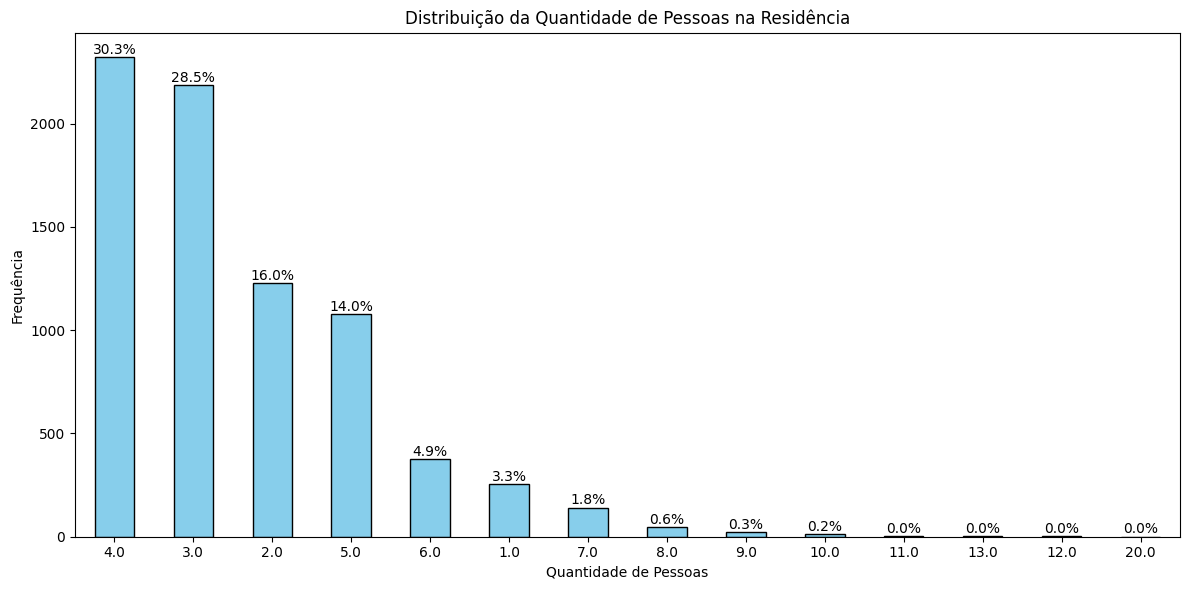

In [33]:
# Calcula a porcentagem de cada valor em relação ao total
contagem_residencia = df_sem_outliers_3['Q005'].value_counts()
total = contagem_residencia.sum()
porcentagens = [(valor / total) * 100 for valor in contagem_residencia]

# Configuração do gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura (opcional)
bars = contagem_residencia.plot(kind='bar', color='skyblue', edgecolor='black')  # Plota o gráfico de barras

# Adiciona os valores em porcentagem nos rótulos das barras
for i, percentual in enumerate(porcentagens):
    plt.text(i, contagem_residencia.iloc[i] + 0.5, f'{percentual:.1f}%', ha='center', va='bottom')

# Configurações adicionais
plt.title('Distribuição da Quantidade de Pessoas na Residência')
plt.xlabel('Quantidade de Pessoas')
plt.ylabel('Frequência')
plt.xticks(rotation=0)  # Rótulos do eixo x na horizontal

# Exibe o gráfico de barras
plt.tight_layout()
plt.show()

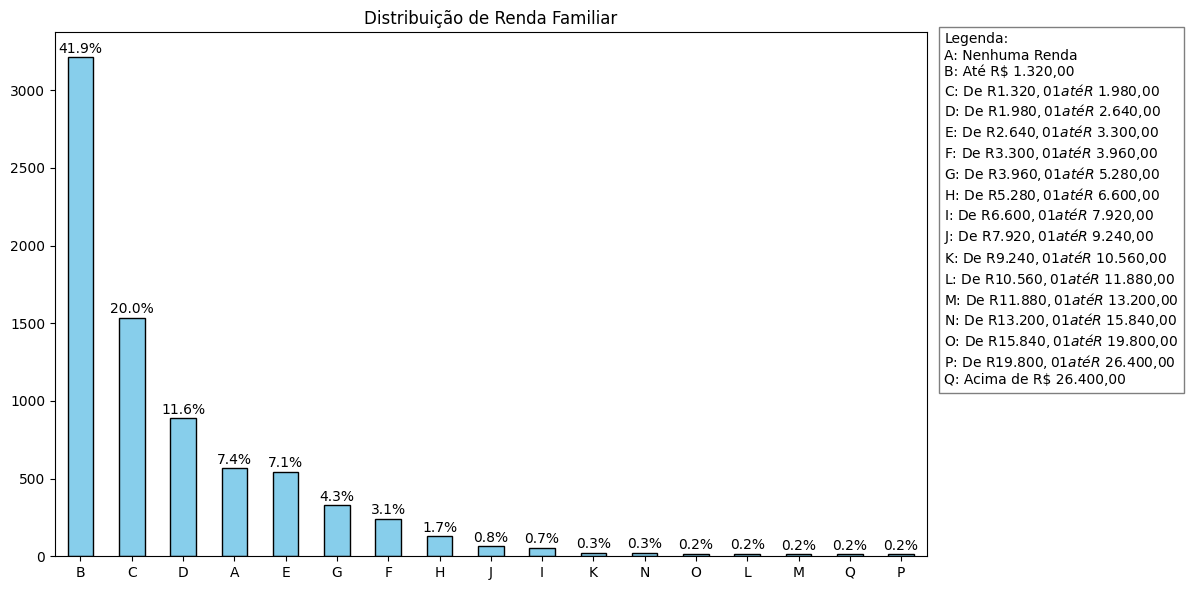

In [34]:
# Define o dicionário com as descrições de renda
descricoes = {
    'A': 'Nenhuma Renda',
    'B': 'Até R$ 1.320,00',
    'C': 'De R$ 1.320,01 até R$ 1.980,00',
    'D': 'De R$ 1.980,01 até R$ 2.640,00',
    'E': 'De R$ 2.640,01 até R$ 3.300,00',
    'F': 'De R$ 3.300,01 até R$ 3.960,00',
    'G': 'De R$ 3.960,01 até R$ 5.280,00',
    'H': 'De R$ 5.280,01 até R$ 6.600,00',
    'I': 'De R$ 6.600,01 até R$ 7.920,00',
    'J': 'De R$ 7.920,01 até R$ 9.240,00',
    'K': 'De R$ 9.240,01 até R$ 10.560,00',
    'L': 'De R$ 10.560,01 até R$ 11.880,00',
    'M': 'De R$ 11.880,01 até R$ 13.200,00',
    'N': 'De R$ 13.200,01 até R$ 15.840,00',
    'O': 'De R$ 15.840,01 até R$ 19.800,00',
    'P': 'De R$ 19.800,01 até R$ 26.400,00',
    'Q': 'Acima de R$ 26.400,00'
}

# Calcula a porcentagem de cada valor em relação ao total
contagem_renda = df_sem_outliers_3['Q006'].value_counts()
total = contagem_renda.sum()
porcentagens = [(valor / total) * 100 for valor in contagem_renda]

# Configuração do gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura (opcional)
bars = contagem_renda.plot(kind='bar', color='skyblue', edgecolor='black')  # Plota o gráfico de barras

# Adiciona os valores em porcentagem nos rótulos das barras
for i, percentual in enumerate(porcentagens):
    plt.text(i, contagem_renda[i] + 10, f'{percentual:.1f}%', ha='center', va='bottom')

# Configurações da legenda como bloco
legenda_texto = '\n'.join([f'{codigo}: {descricao}' for codigo, descricao in descricoes.items()])
plt.text(1.02, 1.00, f'Legenda:\n{legenda_texto}', transform=plt.gca().transAxes, fontsize=10, va='top', bbox=dict(facecolor='white', alpha=0.5))

# Configurações adicionais
plt.title('Distribuição de Renda Familiar')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)  # Rótulos do eixo x na horizontal

# Exibe o gráfico de barras
plt.tight_layout()
plt.show()

# Análise dos 25% melhores melhores resultados e 25% piores resultados




In [35]:
# Calcular os percentis 25 e 75 das notas
percentil_25 = df_sem_outliers_3[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].quantile(0.25)
percentil_75 = df_sem_outliers_3[['NU_NOTA_REDACAO', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']].quantile(0.75)

# Filtrar os estudantes nas melhores e piores faixas
melhores_notas = df_sem_outliers_3[
    (df_sem_outliers_3['NU_NOTA_REDACAO'] >= percentil_75['NU_NOTA_REDACAO']) &
    (df_sem_outliers_3['NU_NOTA_CN'] >= percentil_75['NU_NOTA_CN']) &
    (df_sem_outliers_3['NU_NOTA_CH'] >= percentil_75['NU_NOTA_CH']) &
    (df_sem_outliers_3['NU_NOTA_LC'] >= percentil_75['NU_NOTA_LC']) &
    (df_sem_outliers_3['NU_NOTA_MT'] >= percentil_75['NU_NOTA_MT'])
]

piores_notas = df_sem_outliers_3[
    (df_sem_outliers_3['NU_NOTA_REDACAO'] <= percentil_25['NU_NOTA_REDACAO']) &
    (df_sem_outliers_3['NU_NOTA_CN'] <= percentil_25['NU_NOTA_CN']) &
    (df_sem_outliers_3['NU_NOTA_CH'] <= percentil_25['NU_NOTA_CH']) &
    (df_sem_outliers_3['NU_NOTA_LC'] <= percentil_25['NU_NOTA_LC']) &
    (df_sem_outliers_3['NU_NOTA_MT'] <= percentil_25['NU_NOTA_MT'])
]


Análise do perfil dos candidatos com as melhores notas.

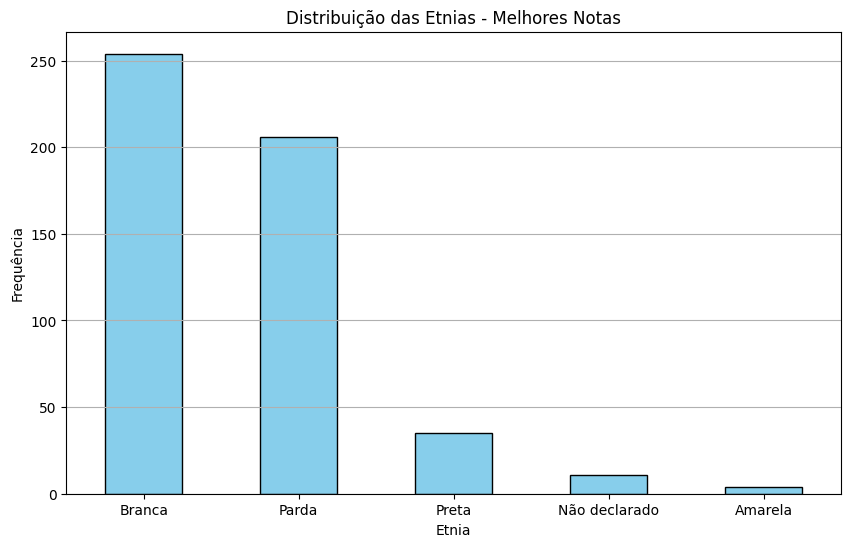

In [36]:
# Contagem de valores únicos na coluna TP_COR_RACA
contagem_etnias = melhores_notas['TP_COR_RACA'].value_counts()

# Configuração do gráfico de colunas
plt.figure(figsize=(10, 6))  # Ajusta o tamanho da figura (opcional)
contagem_etnias.plot(kind='bar', color='skyblue', edgecolor='black')  # Plota o gráfico de colunas

# Configurações adicionais
plt.title('Distribuição das Etnias - Melhores Notas')
plt.xlabel('Etnia')
plt.ylabel('Frequência')
plt.xticks(rotation=0)  # Rótulos do eixo x na horizontal
plt.grid(axis='y')  # Habilita a grade apenas no eixo y (opcional)

# Exibe o gráfico de colunas
plt.show()

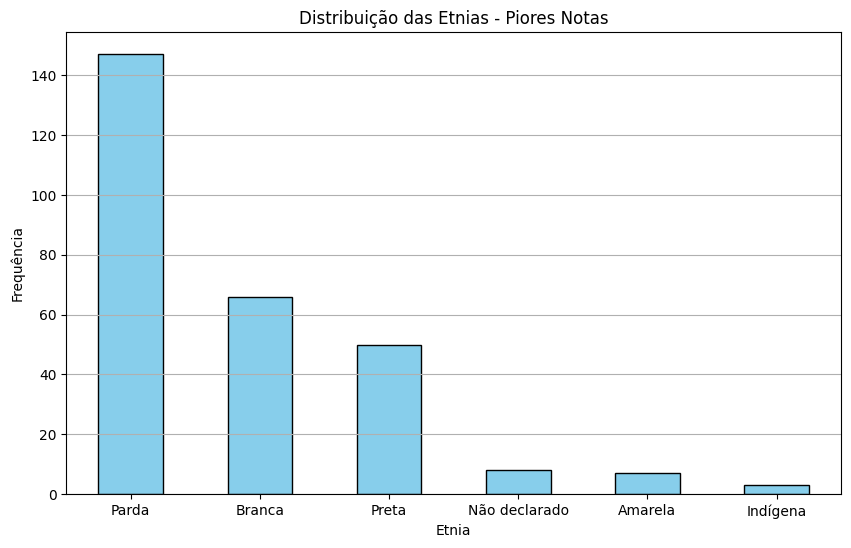

In [37]:
# Contagem de valores únicos na coluna TP_COR_RACA
contagem_etnias = piores_notas['TP_COR_RACA'].value_counts()

# Configuração do gráfico de colunas
plt.figure(figsize=(10, 6))  # Ajusta o tamanho da figura (opcional)
contagem_etnias.plot(kind='bar', color='skyblue', edgecolor='black')  # Plota o gráfico de colunas

# Configurações adicionais
plt.title('Distribuição das Etnias - Piores Notas')
plt.xlabel('Etnia')
plt.ylabel('Frequência')
plt.xticks(rotation=0)  # Rótulos do eixo x na horizontal
plt.grid(axis='y')  # Habilita a grade apenas no eixo y (opcional)

# Exibe o gráfico de colunas
plt.show()

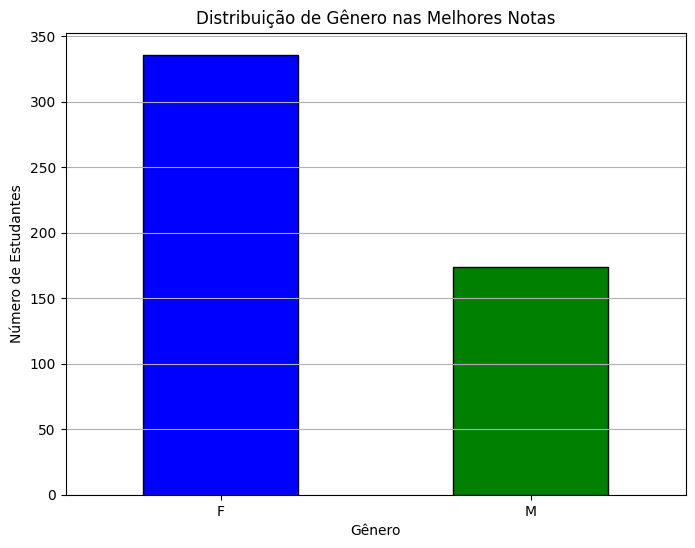

In [38]:
# Contagem de valores únicos na coluna TP_SEXO
contagem_sexo = melhores_notas['TP_SEXO'].value_counts()

# Configuração do gráfico de barras
plt.figure(figsize=(8, 6))  # Ajusta o tamanho da figura (opcional)
contagem_sexo.plot(kind='bar', color=['blue', 'green'], edgecolor='black')  # Plota o gráfico de barras

# Configurações adicionais
plt.title('Distribuição de Gênero nas Melhores Notas')
plt.xlabel('Gênero')
plt.ylabel('Número de Estudantes')
plt.xticks(rotation=0)  # Rótulos do eixo x na horizontal
plt.grid(axis='y')  # Habilita a grade apenas no eixo y (opcional)

# Exibe o gráfico de barras
plt.show()

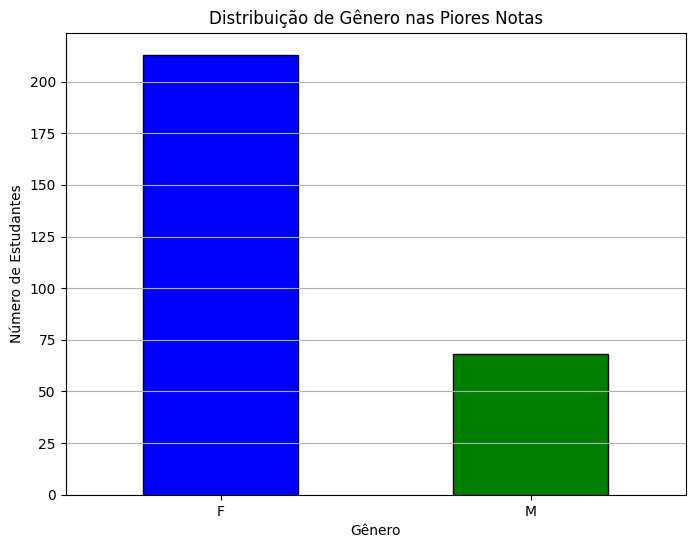

In [39]:
# Contagem de valores únicos na coluna TP_SEXO
contagem_sexo = piores_notas['TP_SEXO'].value_counts()

# Configuração do gráfico de barras
plt.figure(figsize=(8, 6))  # Ajusta o tamanho da figura (opcional)
contagem_sexo.plot(kind='bar', color=['blue', 'green'], edgecolor='black')  # Plota o gráfico de barras

# Configurações adicionais
plt.title('Distribuição de Gênero nas Piores Notas')
plt.xlabel('Gênero')
plt.ylabel('Número de Estudantes')
plt.xticks(rotation=0)  # Rótulos do eixo x na horizontal
plt.grid(axis='y')  # Habilita a grade apenas no eixo y (opcional)

# Exibe o gráfico de barras
plt.show()

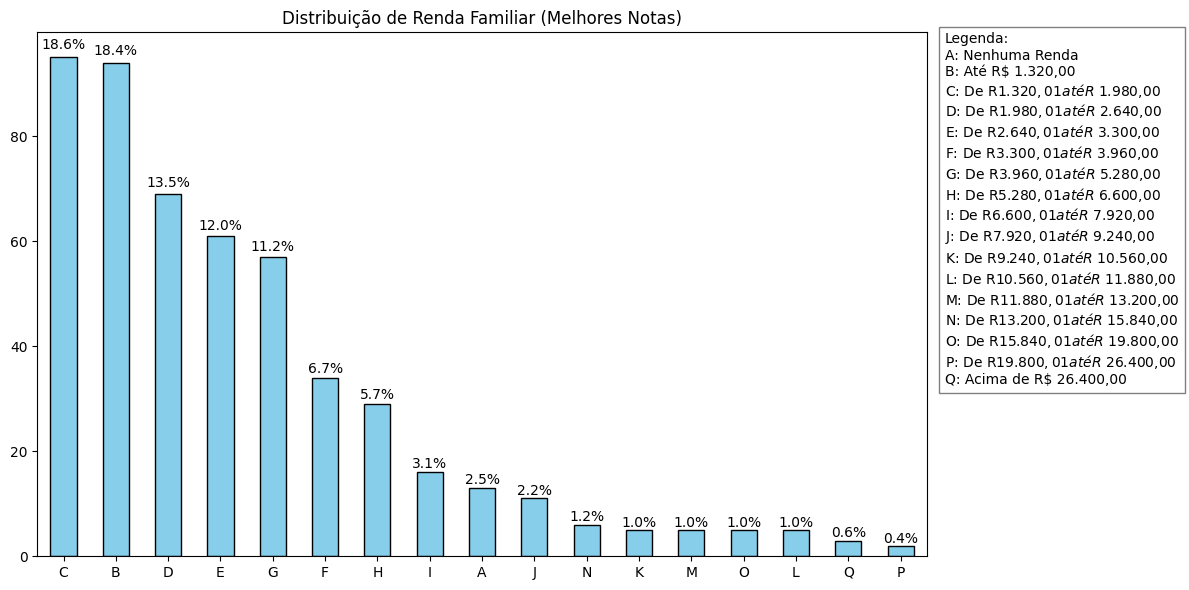

In [40]:
# Definindo o dicionário de descrições de renda
descricoes = {
    'A': 'Nenhuma Renda',
    'B': 'Até R$ 1.320,00',
    'C': 'De R$ 1.320,01 até R$ 1.980,00',
    'D': 'De R$ 1.980,01 até R$ 2.640,00',
    'E': 'De R$ 2.640,01 até R$ 3.300,00',
    'F': 'De R$ 3.300,01 até R$ 3.960,00',
    'G': 'De R$ 3.960,01 até R$ 5.280,00',
    'H': 'De R$ 5.280,01 até R$ 6.600,00',
    'I': 'De R$ 6.600,01 até R$ 7.920,00',
    'J': 'De R$ 7.920,01 até R$ 9.240,00',
    'K': 'De R$ 9.240,01 até R$ 10.560,00',
    'L': 'De R$ 10.560,01 até R$ 11.880,00',
    'M': 'De R$ 11.880,01 até R$ 13.200,00',
    'N': 'De R$ 13.200,01 até R$ 15.840,00',
    'O': 'De R$ 15.840,01 até R$ 19.800,00',
    'P': 'De R$ 19.800,01 até R$ 26.400,00',
    'Q': 'Acima de R$ 26.400,00'
}

# Calcula a porcentagem de cada valor em relação ao total
contagem_renda = melhores_notas['Q006'].value_counts()
total = contagem_renda.sum()
porcentagens = [(valor / total) * 100 for valor in contagem_renda]

# Configuração do gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura (opcional)
bars = contagem_renda.plot(kind='bar', color='skyblue', edgecolor='black')  # Plota o gráfico de barras

# Adiciona os valores em porcentagem nos rótulos das barras
for i, percentual in enumerate(porcentagens):
    plt.text(i, contagem_renda.iloc[i] + contagem_renda.iloc[i]*0.01, f'{percentual:.1f}%', ha='center', va='bottom')

# Configurações da legenda como bloco
legenda_texto = '\n'.join([f'{codigo}: {descricao}' for codigo, descricao in descricoes.items()])
plt.text(1.02, 1.00, f'Legenda:\n{legenda_texto}', transform=plt.gca().transAxes, fontsize=10, va='top', bbox=dict(facecolor='white', alpha=0.5))

# Configurações adicionais
plt.title('Distribuição de Renda Familiar (Melhores Notas)')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)  # Rótulos do eixo x na horizontal

# Exibe o gráfico de barras
plt.tight_layout()
plt.show()

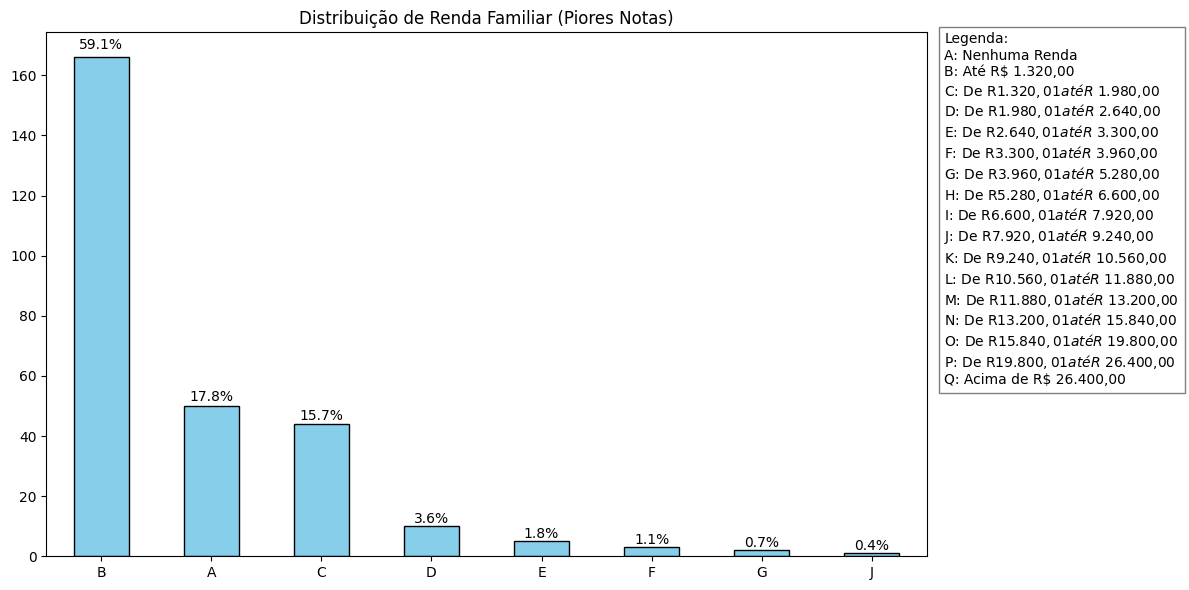

In [41]:

# Definindo o dicionário de descrições de renda
descricoes = {
    'A': 'Nenhuma Renda',
    'B': 'Até R$ 1.320,00',
    'C': 'De R$ 1.320,01 até R$ 1.980,00',
    'D': 'De R$ 1.980,01 até R$ 2.640,00',
    'E': 'De R$ 2.640,01 até R$ 3.300,00',
    'F': 'De R$ 3.300,01 até R$ 3.960,00',
    'G': 'De R$ 3.960,01 até R$ 5.280,00',
    'H': 'De R$ 5.280,01 até R$ 6.600,00',
    'I': 'De R$ 6.600,01 até R$ 7.920,00',
    'J': 'De R$ 7.920,01 até R$ 9.240,00',
    'K': 'De R$ 9.240,01 até R$ 10.560,00',
    'L': 'De R$ 10.560,01 até R$ 11.880,00',
    'M': 'De R$ 11.880,01 até R$ 13.200,00',
    'N': 'De R$ 13.200,01 até R$ 15.840,00',
    'O': 'De R$ 15.840,01 até R$ 19.800,00',
    'P': 'De R$ 19.800,01 até R$ 26.400,00',
    'Q': 'Acima de R$ 26.400,00'
}

# Calcula a porcentagem de cada valor em relação ao total
contagem_renda = piores_notas['Q006'].value_counts()
total = contagem_renda.sum()
porcentagens = [(valor / total) * 100 for valor in contagem_renda]

# Configuração do gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura (opcional)
bars = contagem_renda.plot(kind='bar', color='skyblue', edgecolor='black')  # Plota o gráfico de barras

# Adiciona os valores em porcentagem nos rótulos das barras
for i, percentual in enumerate(porcentagens):
    plt.text(i, contagem_renda.iloc[i] + contagem_renda.iloc[i]*0.01, f'{percentual:.1f}%', ha='center', va='bottom')

# Configurações da legenda como bloco
legenda_texto = '\n'.join([f'{codigo}: {descricao}' for codigo, descricao in descricoes.items()])
plt.text(1.02, 1.00, f'Legenda:\n{legenda_texto}', transform=plt.gca().transAxes, fontsize=10, va='top', bbox=dict(facecolor='white', alpha=0.5))

# Configurações adicionais
plt.title('Distribuição de Renda Familiar (Piores Notas)')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)  # Rótulos do eixo x na horizontal

# Exibe o gráfico de barras
plt.tight_layout()
plt.show()

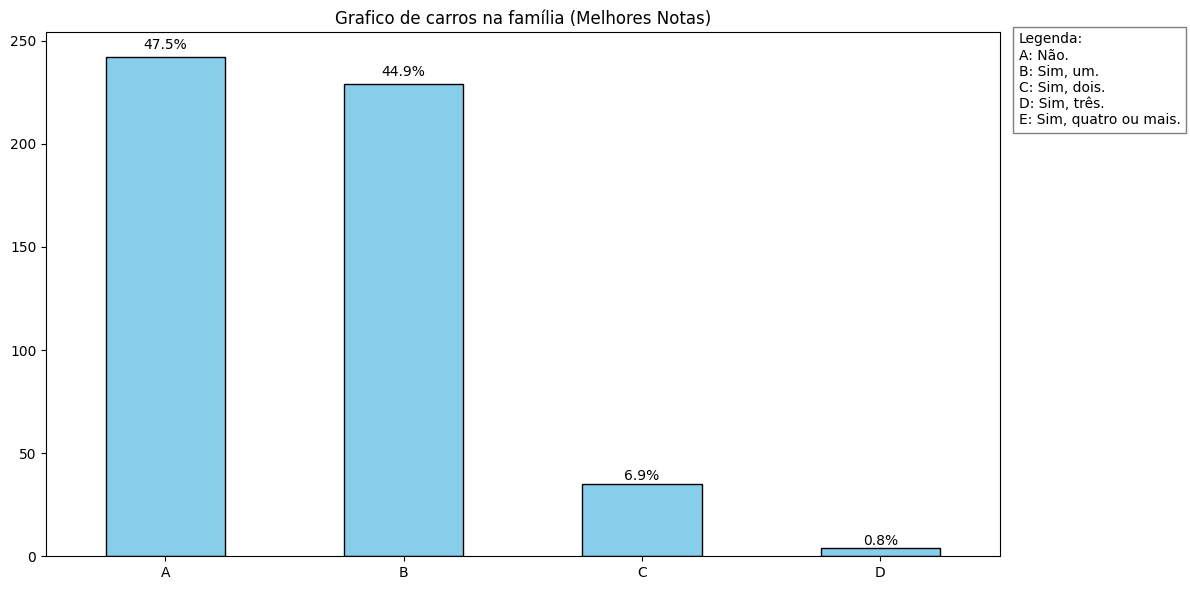

In [42]:
# Definindo o dicionário de descrições para Q010
descricoes_q010 = {
    'A': 'Não.',
    'B': 'Sim, um.',
    'C': 'Sim, dois.',
    'D': 'Sim, três.',
    'E': 'Sim, quatro ou mais.'
}

# Calcula a porcentagem de cada valor em relação ao total
contagem_q010 = melhores_notas['Q010'].value_counts()
total_q010 = contagem_q010.sum()
porcentagens_q010 = [(valor / total_q010) * 100 for valor in contagem_q010]

# Configuração do gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura (opcional)
bars_q010 = contagem_q010.plot(kind='bar', color='skyblue', edgecolor='black')  # Plota o gráfico de barras

# Adiciona os valores em porcentagem nos rótulos das barras
for i, percentual in enumerate(porcentagens_q010):
    plt.text(i, contagem_q010.iloc[i] + contagem_q010.iloc[i]*0.01, f'{percentual:.1f}%', ha='center', va='bottom')

# Configurações da legenda como bloco
legenda_texto_q010 = '\n'.join([f'{codigo}: {descricao}' for codigo, descricao in descricoes_q010.items()])
plt.text(1.02, 1.00, f'Legenda:\n{legenda_texto_q010}', transform=plt.gca().transAxes, fontsize=10, va='top', bbox=dict(facecolor='white', alpha=0.5))

# Configurações adicionais
plt.title('Grafico de carros na família (Melhores Notas)')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)  # Rótulos do eixo x na horizontal

# Exibe o gráfico de barras
plt.tight_layout()
plt.show()

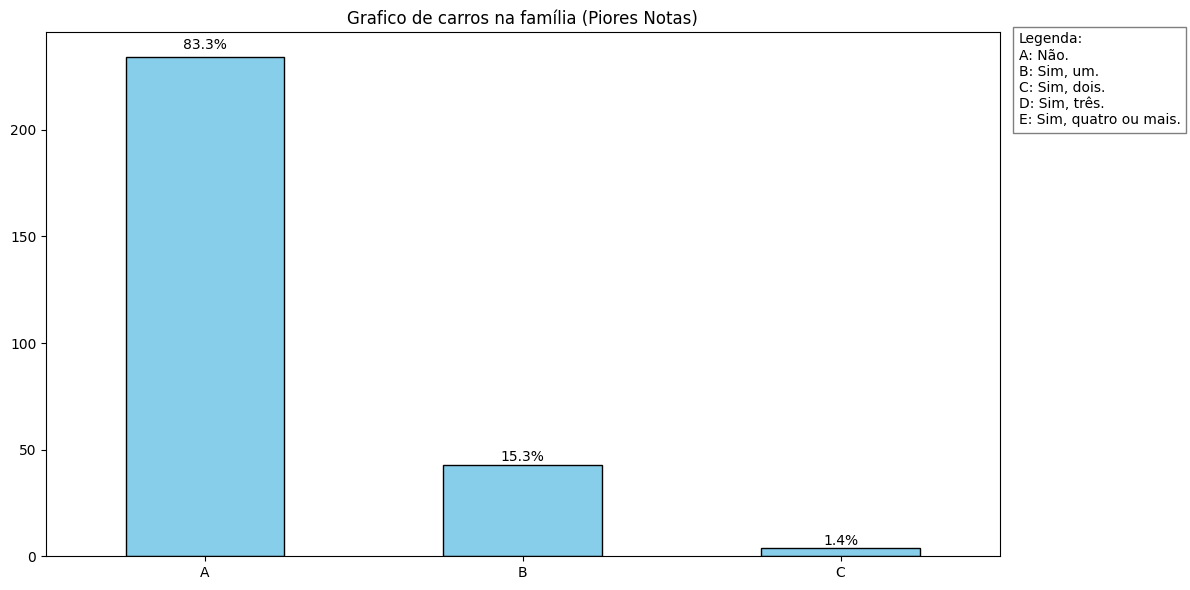

In [43]:
# Definindo o dicionário de descrições para Q010
descricoes_q010 = {
    'A': 'Não.',
    'B': 'Sim, um.',
    'C': 'Sim, dois.',
    'D': 'Sim, três.',
    'E': 'Sim, quatro ou mais.'
}

# Calcula a porcentagem de cada valor em relação ao total
contagem_q010 = piores_notas['Q010'].value_counts()
total_q010 = contagem_q010.sum()
porcentagens_q010 = [(valor / total_q010) * 100 for valor in contagem_q010]

# Configuração do gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura (opcional)
bars_q010 = contagem_q010.plot(kind='bar', color='skyblue', edgecolor='black')  # Plota o gráfico de barras

# Adiciona os valores em porcentagem nos rótulos das barras
for i, percentual in enumerate(porcentagens_q010):
    plt.text(i, contagem_q010.iloc[i] + contagem_q010.iloc[i]*0.01, f'{percentual:.1f}%', ha='center', va='bottom')

# Configurações da legenda como bloco
legenda_texto_q010 = '\n'.join([f'{codigo}: {descricao}' for codigo, descricao in descricoes_q010.items()])
plt.text(1.02, 1.00, f'Legenda:\n{legenda_texto_q010}', transform=plt.gca().transAxes, fontsize=10, va='top', bbox=dict(facecolor='white', alpha=0.5))

# Configurações adicionais
plt.title('Grafico de carros na família (Piores Notas)')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)  # Rótulos do eixo x na horizontal

# Exibe o gráfico de barras
plt.tight_layout()
plt.show()

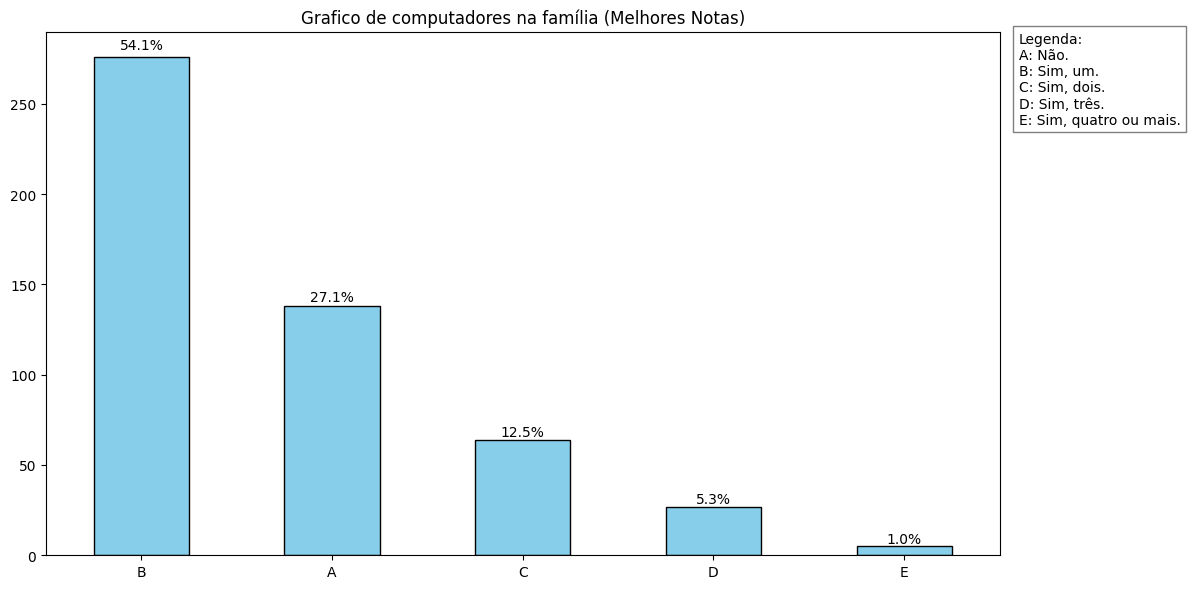

In [44]:
# Definindo o dicionário de descrições para Q010
descricoes_q010 = {
    'A': 'Não.',
    'B': 'Sim, um.',
    'C': 'Sim, dois.',
    'D': 'Sim, três.',
    'E': 'Sim, quatro ou mais.'
}

# Calcula a porcentagem de cada valor em relação ao total
contagem_q010 = melhores_notas['Q024'].value_counts()
total_q010 = contagem_q010.sum()
porcentagens_q010 = [(valor / total_q010) * 100 for valor in contagem_q010]

# Configuração do gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura (opcional)
bars_q010 = contagem_q010.plot(kind='bar', color='skyblue', edgecolor='black')  # Plota o gráfico de barras

# Adiciona os valores em porcentagem nos rótulos das barras
for i, percentual in enumerate(porcentagens_q010):
    plt.text(i, contagem_q010.iloc[i] + contagem_q010.iloc[i]*0.01, f'{percentual:.1f}%', ha='center', va='bottom')

# Configurações da legenda como bloco
legenda_texto_q010 = '\n'.join([f'{codigo}: {descricao}' for codigo, descricao in descricoes_q010.items()])
plt.text(1.02, 1.00, f'Legenda:\n{legenda_texto_q010}', transform=plt.gca().transAxes, fontsize=10, va='top', bbox=dict(facecolor='white', alpha=0.5))

# Configurações adicionais
plt.title('Grafico de computadores na família (Melhores Notas)')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)  # Rótulos do eixo x na horizontal

# Exibe o gráfico de barras
plt.tight_layout()
plt.show()

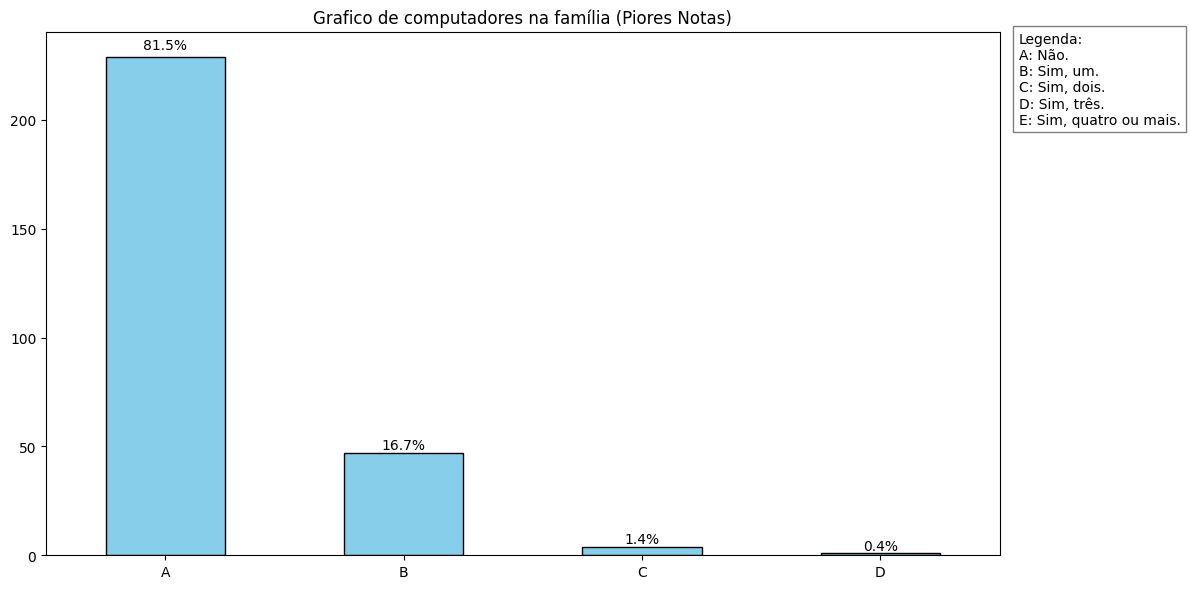

In [45]:
# Definindo o dicionário de descrições para Q010
descricoes_q010 = {
    'A': 'Não.',
    'B': 'Sim, um.',
    'C': 'Sim, dois.',
    'D': 'Sim, três.',
    'E': 'Sim, quatro ou mais.'
}

# Calcula a porcentagem de cada valor em relação ao total
contagem_q010 = piores_notas['Q024'].value_counts()
total_q010 = contagem_q010.sum()
porcentagens_q010 = [(valor / total_q010) * 100 for valor in contagem_q010]

# Configuração do gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura (opcional)
bars_q010 = contagem_q010.plot(kind='bar', color='skyblue', edgecolor='black')  # Plota o gráfico de barras

# Adiciona os valores em porcentagem nos rótulos das barras
for i, percentual in enumerate(porcentagens_q010):
    plt.text(i, contagem_q010.iloc[i] + contagem_q010.iloc[i]*0.01, f'{percentual:.1f}%', ha='center', va='bottom')

# Configurações da legenda como bloco
legenda_texto_q010 = '\n'.join([f'{codigo}: {descricao}' for codigo, descricao in descricoes_q010.items()])
plt.text(1.02, 1.00, f'Legenda:\n{legenda_texto_q010}', transform=plt.gca().transAxes, fontsize=10, va='top', bbox=dict(facecolor='white', alpha=0.5))

# Configurações adicionais
plt.title('Grafico de computadores na família (Piores Notas)')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)  # Rótulos do eixo x na horizontal

# Exibe o gráfico de barras
plt.tight_layout()
plt.show()

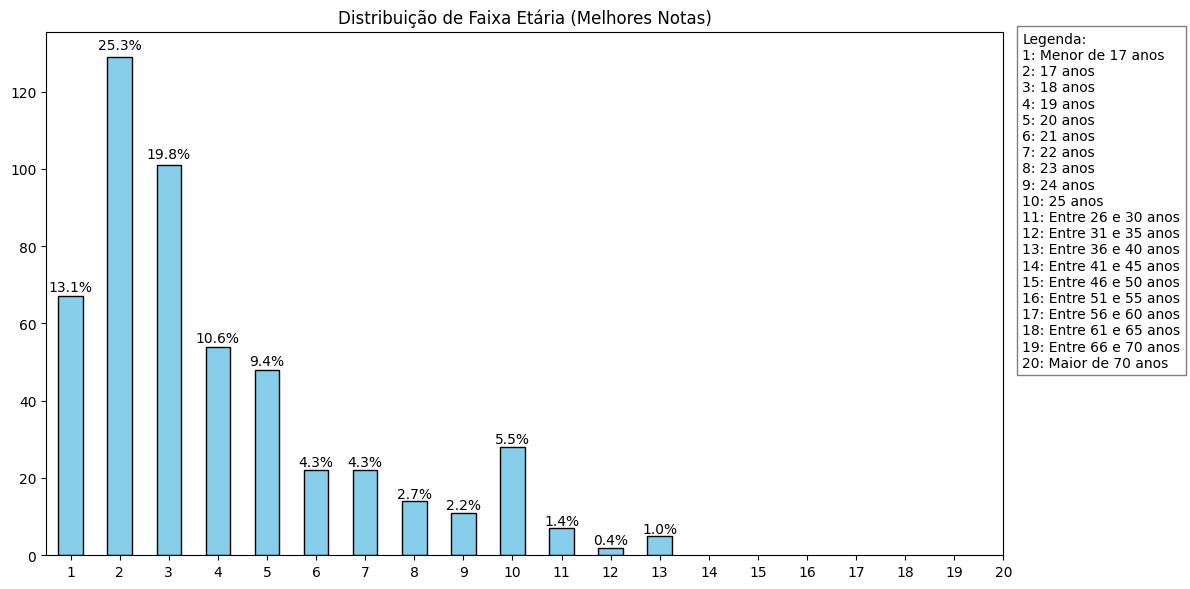

In [46]:
import numpy as np

# Definindo o dicionário de descrições para TP_FAIXA_ETARIA
descricoes_faixa_etaria = {
    1: 'Menor de 17 anos',
    2: '17 anos',
    3: '18 anos',
    4: '19 anos',
    5: '20 anos',
    6: '21 anos',
    7: '22 anos',
    8: '23 anos',
    9: '24 anos',
    10: '25 anos',
    11: 'Entre 26 e 30 anos',
    12: 'Entre 31 e 35 anos',
    13: 'Entre 36 e 40 anos',
    14: 'Entre 41 e 45 anos',
    15: 'Entre 46 e 50 anos',
    16: 'Entre 51 e 55 anos',
    17: 'Entre 56 e 60 anos',
    18: 'Entre 61 e 65 anos',
    19: 'Entre 66 e 70 anos',
    20: 'Maior de 70 anos'
}

# Calcula a porcentagem de cada valor em relação ao total
contagem_faixa_etaria = melhores_notas['TP_FAIXA_ETARIA'].value_counts().sort_index()
total_faixa_etaria = contagem_faixa_etaria.sum()
porcentagens_faixa_etaria = [(valor / total_faixa_etaria) * 100 for valor in contagem_faixa_etaria]

# Configuração do gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura (opcional)
bars_faixa_etaria = contagem_faixa_etaria.plot(kind='bar', color='skyblue', edgecolor='black')  # Plota o gráfico de barras

# Adiciona os valores em porcentagem nos rótulos das barras
for i, percentual in enumerate(porcentagens_faixa_etaria):
    plt.text(i, contagem_faixa_etaria.iloc[i] + contagem_faixa_etaria.iloc[i]*0.01, f'{percentual:.1f}%', ha='center', va='bottom')

# Configurações da legenda como bloco
legenda_texto_faixa_etaria = '\n'.join([f'{codigo}: {descricao}' for codigo, descricao in descricoes_faixa_etaria.items()])
plt.text(1.02, 1.00, f'Legenda:\n{legenda_texto_faixa_etaria}', transform=plt.gca().transAxes, fontsize=10, va='top', bbox=dict(facecolor='white', alpha=0.5))

# Configurações adicionais
plt.title('Distribuição de Faixa Etária (Melhores Notas)')
plt.xlabel('')
plt.ylabel('')
plt.xticks(ticks=np.arange(20), labels=np.arange(1, 21), rotation=0)  # Rótulos do eixo x de 1 a 20 com rotação de 90 graus

# Exibe o gráfico de barras
plt.tight_layout()
plt.show()

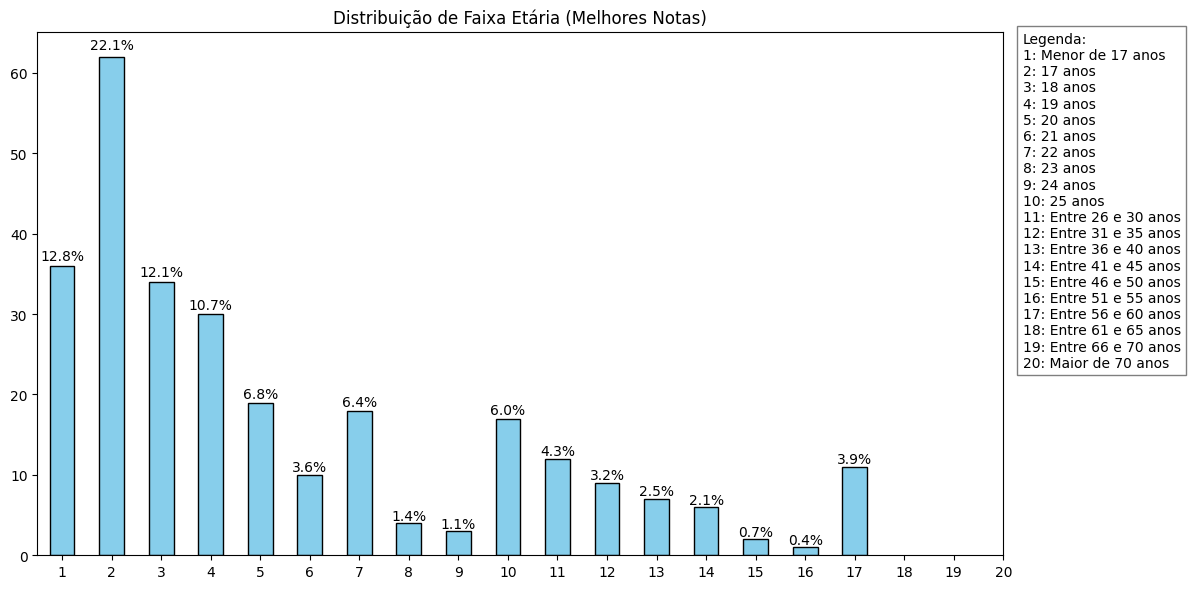

In [47]:
# Definindo o dicionário de descrições para TP_FAIXA_ETARIA
descricoes_faixa_etaria = {
    1: 'Menor de 17 anos',
    2: '17 anos',
    3: '18 anos',
    4: '19 anos',
    5: '20 anos',
    6: '21 anos',
    7: '22 anos',
    8: '23 anos',
    9: '24 anos',
    10: '25 anos',
    11: 'Entre 26 e 30 anos',
    12: 'Entre 31 e 35 anos',
    13: 'Entre 36 e 40 anos',
    14: 'Entre 41 e 45 anos',
    15: 'Entre 46 e 50 anos',
    16: 'Entre 51 e 55 anos',
    17: 'Entre 56 e 60 anos',
    18: 'Entre 61 e 65 anos',
    19: 'Entre 66 e 70 anos',
    20: 'Maior de 70 anos'
}

# Calcula a porcentagem de cada valor em relação ao total
contagem_faixa_etaria = piores_notas['TP_FAIXA_ETARIA'].value_counts().sort_index()
total_faixa_etaria = contagem_faixa_etaria.sum()
porcentagens_faixa_etaria = [(valor / total_faixa_etaria) * 100 for valor in contagem_faixa_etaria]

# Configuração do gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura (opcional)
bars_faixa_etaria = contagem_faixa_etaria.plot(kind='bar', color='skyblue', edgecolor='black')  # Plota o gráfico de barras

# Adiciona os valores em porcentagem nos rótulos das barras
for i, percentual in enumerate(porcentagens_faixa_etaria):
    plt.text(i, contagem_faixa_etaria.iloc[i] + contagem_faixa_etaria.iloc[i]*0.01, f'{percentual:.1f}%', ha='center', va='bottom')

# Configurações da legenda como bloco
legenda_texto_faixa_etaria = '\n'.join([f'{codigo}: {descricao}' for codigo, descricao in descricoes_faixa_etaria.items()])
plt.text(1.02, 1.00, f'Legenda:\n{legenda_texto_faixa_etaria}', transform=plt.gca().transAxes, fontsize=10, va='top', bbox=dict(facecolor='white', alpha=0.5))

# Configurações adicionais
plt.title('Distribuição de Faixa Etária (Melhores Notas)')
plt.xlabel('')
plt.ylabel('')
plt.xticks(ticks=np.arange(20), labels=np.arange(1, 21), rotation=0)  # Rótulos do eixo x de 1 a 20 com rotação de 90 graus

# Exibe o gráfico de barras
plt.tight_layout()
plt.show()

In [48]:
# Definindo o dicionário de descrições para Q003 e Q004
descricoes_profissao = {
    'A': 'Grupo 1: Lavrador, agricultor sem empregados, bóia fria, criador de animais (gado, porcos, galinhas, ovelhas, cavalos etc.), apicultor, pescador, lenhador, seringueiro, extrativista.',
    'B': 'Grupo 2: Diarista, empregado doméstico, cuidador de idosos, babá, cozinheiro (em casas particulares), motorista particular, jardineiro, faxineiro de empresas e prédios, vigilante, porteiro, carteiro, office-boy, vendedor, caixa, atendente de loja, auxiliar administrativo, recepcionista, servente de pedreiro, repositor de mercadoria.',
    'C': 'Grupo 3: Padeiro, cozinheiro industrial ou em restaurantes, sapateiro, costureiro, joalheiro, torneiro mecânico, operador de máquinas, soldador, operário de fábrica, trabalhador da mineração, pedreiro, pintor, eletricista, encanador, motorista, caminhoneiro, taxista.',
    'D': 'Grupo 4: Professor (de ensino fundamental ou médio, idioma, música, artes etc.), técnico (de enfermagem, contabilidade, eletrônica etc.), policial, militar de baixa patente (soldado, cabo, sargento), corretor de imóveis, supervisor, gerente, mestre de obras, pastor, microempresário (proprietário de empresa com menos de 10 empregados), pequeno comerciante, pequeno proprietário de terras, trabalhador autônomo ou por conta própria.',
    'E': 'Grupo 5: Médico, engenheiro, dentista, psicólogo, economista, advogado, juiz, promotor, defensor, delegado, tenente, capitão, coronel, professor universitário, diretor em empresas públicas ou privadas, político, proprietário de empresas com mais de 10 empregados.',
    'F': 'Não sei'
     }
# Função para criar gráfico de barras
def criar_grafico_profissao_piores_notas(coluna, titulo):
    contagem = piores_notas[coluna].value_counts().sort_index()
    total = contagem.sum()
    porcentagens = [(valor / total) * 100 for valor in contagem]

    # Configuração do gráfico de barras
    plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura (opcional)
    bars = contagem.plot(kind='bar', color='skyblue', edgecolor='black')  # Plota o gráfico de barras

    # Adiciona os valores em porcentagem nos rótulos das barras
    for i, percentual in enumerate(porcentagens):
        plt.text(i, contagem.iloc[i] + contagem.iloc[i]*0.01, f'{percentual:.1f}%', ha='center', va='bottom')

    # Configurações da legenda como bloco
    legenda_texto = '\n'.join([f'{codigo}: {descricao}' for codigo, descricao in descricoes_profissao.items()])
    plt.text(1.02, 1.00, f'Legenda:\n{legenda_texto}', transform=plt.gca().transAxes, fontsize=10, va='top', bbox=dict(facecolor='white', alpha=0.5))

    # Configurações adicionais
    plt.title(titulo)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=0)  # Rótulos do eixo x com rotação de 90 graus

    # Exibe o gráfico de barras
    plt.tight_layout()
    plt.show()

In [49]:
# Função para criar gráfico de barras
def criar_grafico_profissao_melhores_notas(coluna, titulo):
    contagem = melhores_notas[coluna].value_counts().sort_index()
    total = contagem.sum()
    porcentagens = [(valor / total) * 100 for valor in contagem]

    # Configuração do gráfico de barras
    plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura (opcional)
    bars = contagem.plot(kind='bar', color='skyblue', edgecolor='black')  # Plota o gráfico de barras

    # Adiciona os valores em porcentagem nos rótulos das barras
    for i, percentual in enumerate(porcentagens):
        plt.text(i, contagem.iloc[i] + contagem.iloc[i]*0.01, f'{percentual:.1f}%', ha='center', va='bottom')

    # Configurações da legenda como bloco
    legenda_texto = '\n'.join([f'{codigo}: {descricao}' for codigo, descricao in descricoes_profissao.items()])
    plt.text(1.02, 1.00, f'Legenda:\n{legenda_texto}', transform=plt.gca().transAxes, fontsize=10, va='top', bbox=dict(facecolor='white', alpha=0.5))

    # Configurações adicionais
    plt.title(titulo)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=0)  # Rótulos do eixo x com rotação de 90 graus

    # Exibe o gráfico de barras
    plt.tight_layout()
    plt.show()

<ipython-input-49-dfcfe5c511cf>:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


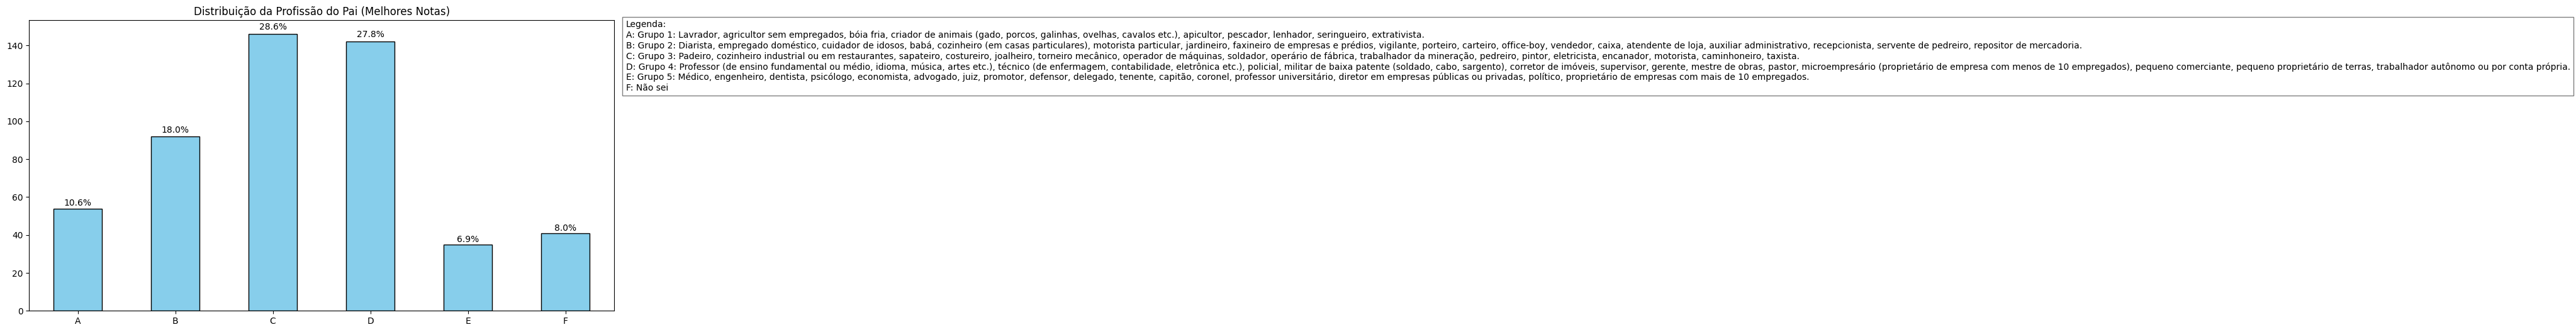

In [50]:
criar_grafico_profissao_melhores_notas('Q003', 'Distribuição da Profissão do Pai (Melhores Notas)')


<ipython-input-49-dfcfe5c511cf>:26: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


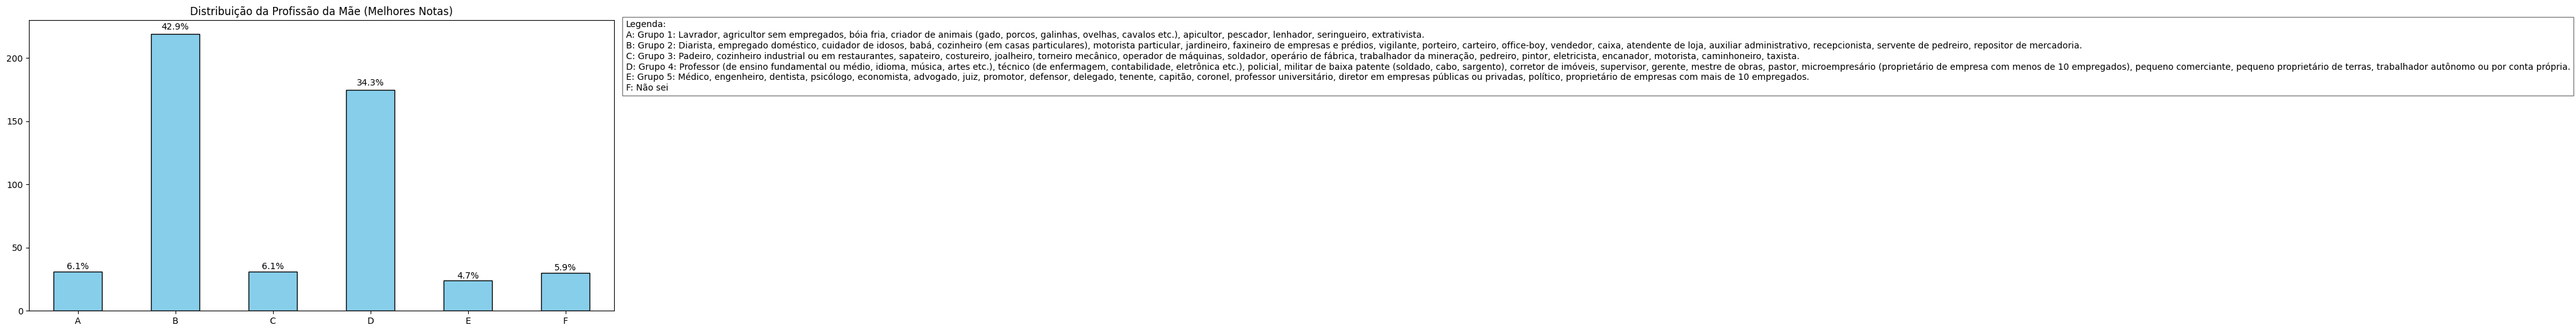

In [51]:
criar_grafico_profissao_melhores_notas('Q004', 'Distribuição da Profissão da Mãe (Melhores Notas)')

<ipython-input-48-02256382b016>:35: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


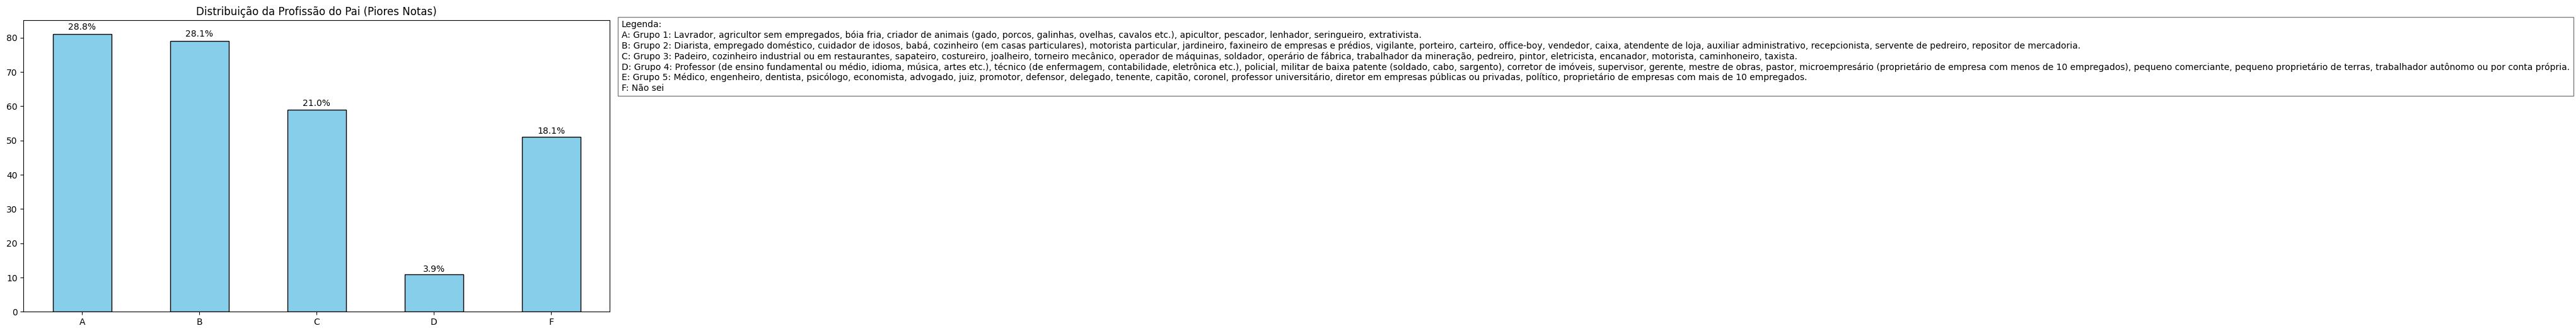

In [52]:
# Gerando gráficos para as colunas Q003
criar_grafico_profissao_piores_notas('Q003', 'Distribuição da Profissão do Pai (Piores Notas)')


<ipython-input-48-02256382b016>:35: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


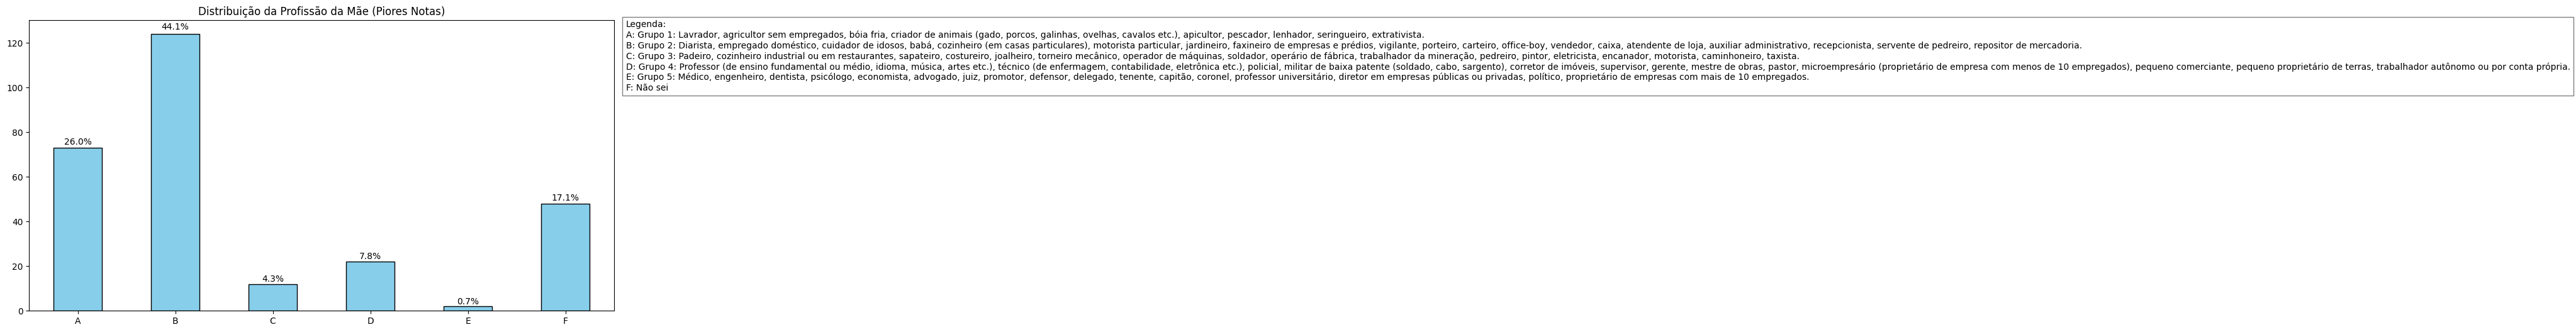

In [53]:
criar_grafico_profissao_piores_notas('Q004', 'Distribuição da Profissão da Mãe (Piores Notas)')

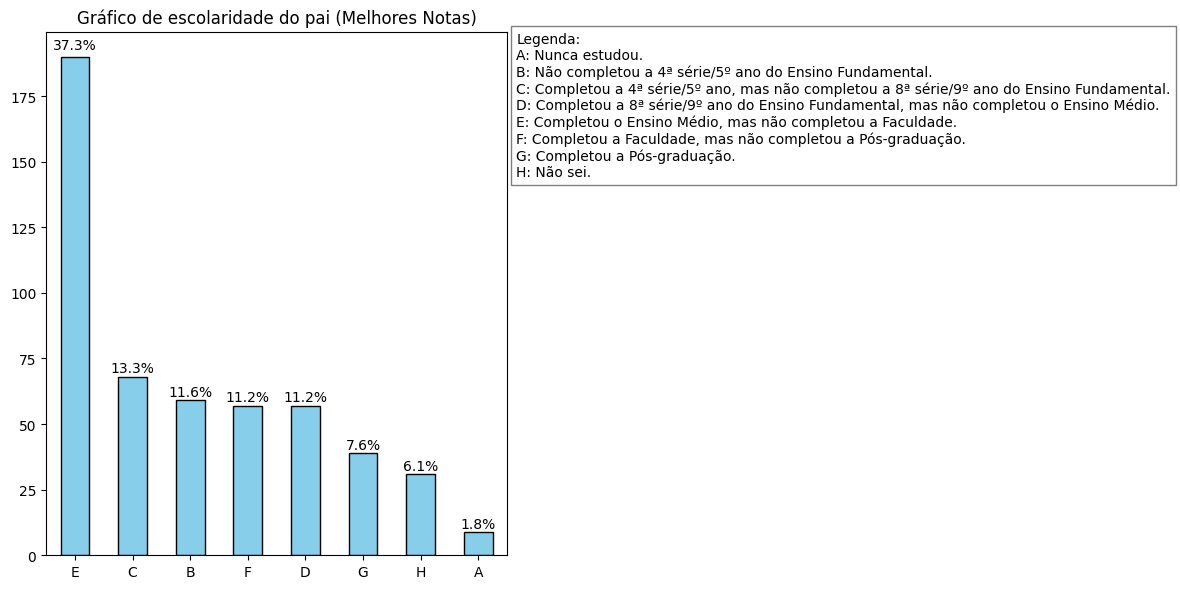

In [54]:
# Definindo o dicionário de descrições para Q001
descricoes_q001 = {
    'A': 'Nunca estudou.',
    'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental.',
    'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental.',
    'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio.',
    'E': 'Completou o Ensino Médio, mas não completou a Faculdade.',
    'F': 'Completou a Faculdade, mas não completou a Pós-graduação.',
    'G': 'Completou a Pós-graduação.',
    'H': 'Não sei.'
}

# Calcula a porcentagem de cada valor em relação ao total
contagem_q001 = melhores_notas['Q001'].value_counts()
total_q001 = contagem_q001.sum()
porcentagens_q001 = [(valor / total_q001) * 100 for valor in contagem_q001]

# Configuração do gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura (opcional)
bars_q001 = contagem_q001.plot(kind='bar', color='skyblue', edgecolor='black')  # Plota o gráfico de barras

# Adiciona os valores em porcentagem nos rótulos das barras
for i, percentual in enumerate(porcentagens_q001):
    plt.text(i, contagem_q001.iloc[i] + contagem_q001.iloc[i]*0.01, f'{percentual:.1f}%', ha='center', va='bottom')

# Configurações da legenda como bloco
legenda_texto_q001 = '\n'.join([f'{codigo}: {descricao}' for codigo, descricao in descricoes_q001.items()])
plt.text(1.02, 1.00, f'Legenda:\n{legenda_texto_q001}', transform=plt.gca().transAxes, fontsize=10, va='top', bbox=dict(facecolor='white', alpha=0.5))

# Configurações adicionais
plt.title('Gráfico de escolaridade do pai (Melhores Notas)')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)  # Rótulos do eixo x na horizontal

# Exibe o gráfico de barras
plt.tight_layout()
plt.show()

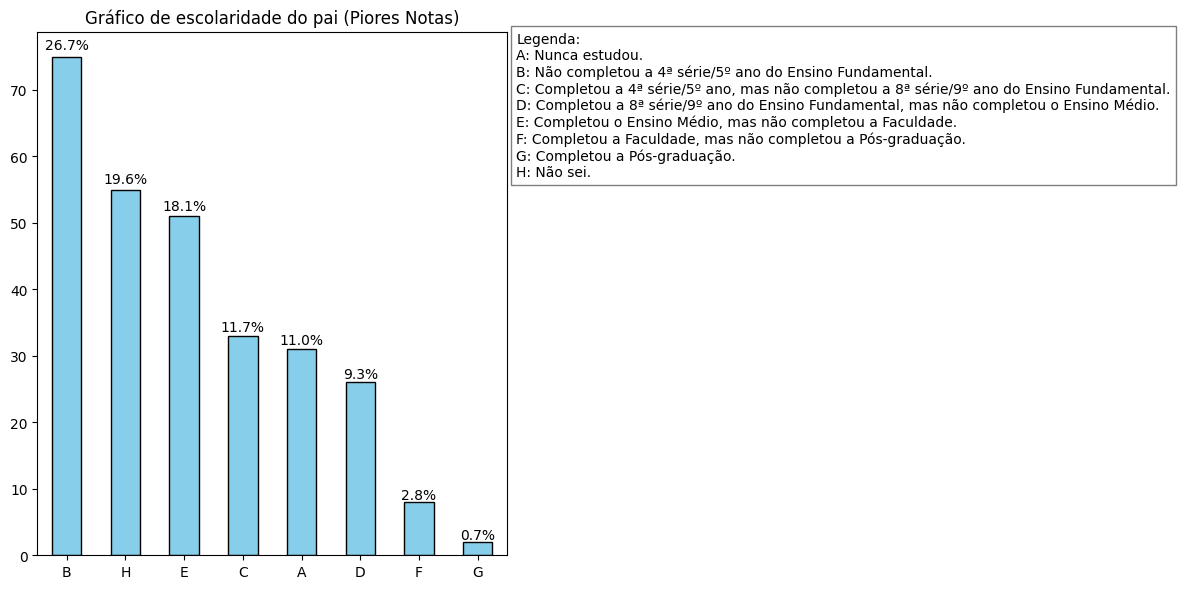

In [55]:
# Calcula a porcentagem de cada valor em relação ao total
contagem_q001 = piores_notas['Q001'].value_counts()
total_q001 = contagem_q001.sum()
porcentagens_q001 = [(valor / total_q001) * 100 for valor in contagem_q001]

# Configuração do gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura (opcional)
bars_q001 = contagem_q001.plot(kind='bar', color='skyblue', edgecolor='black')  # Plota o gráfico de barras

# Adiciona os valores em porcentagem nos rótulos das barras
for i, percentual in enumerate(porcentagens_q001):
    plt.text(i, contagem_q001.iloc[i] + contagem_q001.iloc[i]*0.01, f'{percentual:.1f}%', ha='center', va='bottom')

# Configurações da legenda como bloco
legenda_texto_q001 = '\n'.join([f'{codigo}: {descricao}' for codigo, descricao in descricoes_q001.items()])
plt.text(1.02, 1.00, f'Legenda:\n{legenda_texto_q001}', transform=plt.gca().transAxes, fontsize=10, va='top', bbox=dict(facecolor='white', alpha=0.5))

# Configurações adicionais
plt.title('Gráfico de escolaridade do pai (Piores Notas)')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)  # Rótulos do eixo x na horizontal

# Exibe o gráfico de barras
plt.tight_layout()
plt.show()

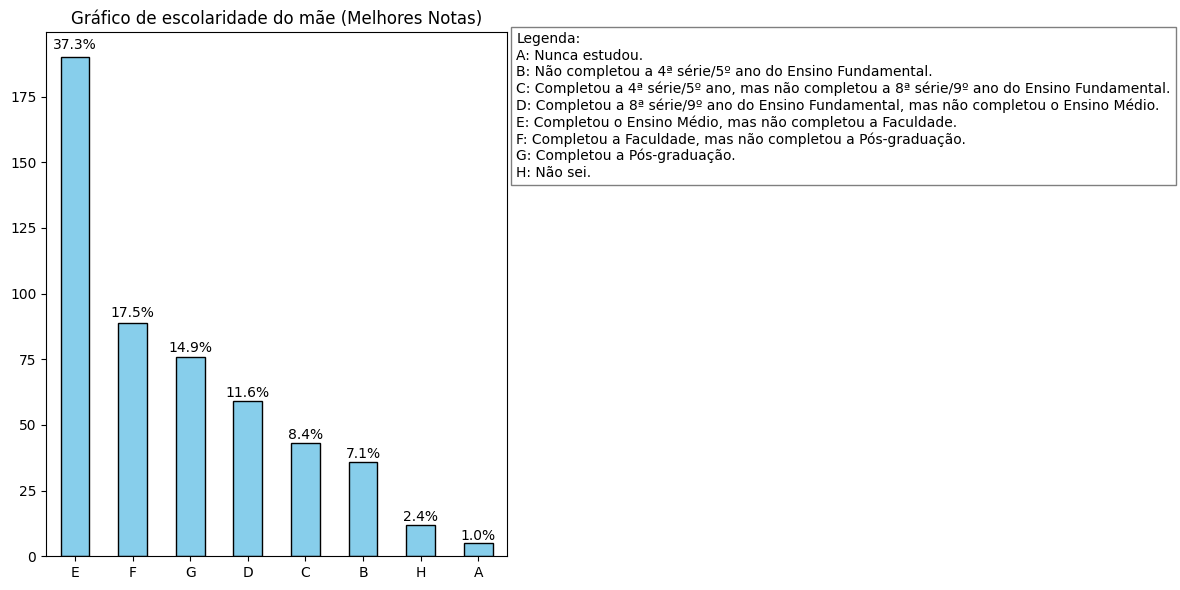

In [56]:
# Calcula a porcentagem de cada valor em relação ao total
contagem_q001 = melhores_notas['Q002'].value_counts()
total_q001 = contagem_q001.sum()
porcentagens_q001 = [(valor / total_q001) * 100 for valor in contagem_q001]

# Configuração do gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura (opcional)
bars_q001 = contagem_q001.plot(kind='bar', color='skyblue', edgecolor='black')  # Plota o gráfico de barras

# Adiciona os valores em porcentagem nos rótulos das barras
for i, percentual in enumerate(porcentagens_q001):
    plt.text(i, contagem_q001.iloc[i] + contagem_q001.iloc[i]*0.01, f'{percentual:.1f}%', ha='center', va='bottom')

# Configurações da legenda como bloco
legenda_texto_q001 = '\n'.join([f'{codigo}: {descricao}' for codigo, descricao in descricoes_q001.items()])
plt.text(1.02, 1.00, f'Legenda:\n{legenda_texto_q001}', transform=plt.gca().transAxes, fontsize=10, va='top', bbox=dict(facecolor='white', alpha=0.5))

# Configurações adicionais
plt.title('Gráfico de escolaridade do mãe (Melhores Notas)')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)  # Rótulos do eixo x na horizontal

# Exibe o gráfico de barras
plt.tight_layout()
plt.show()

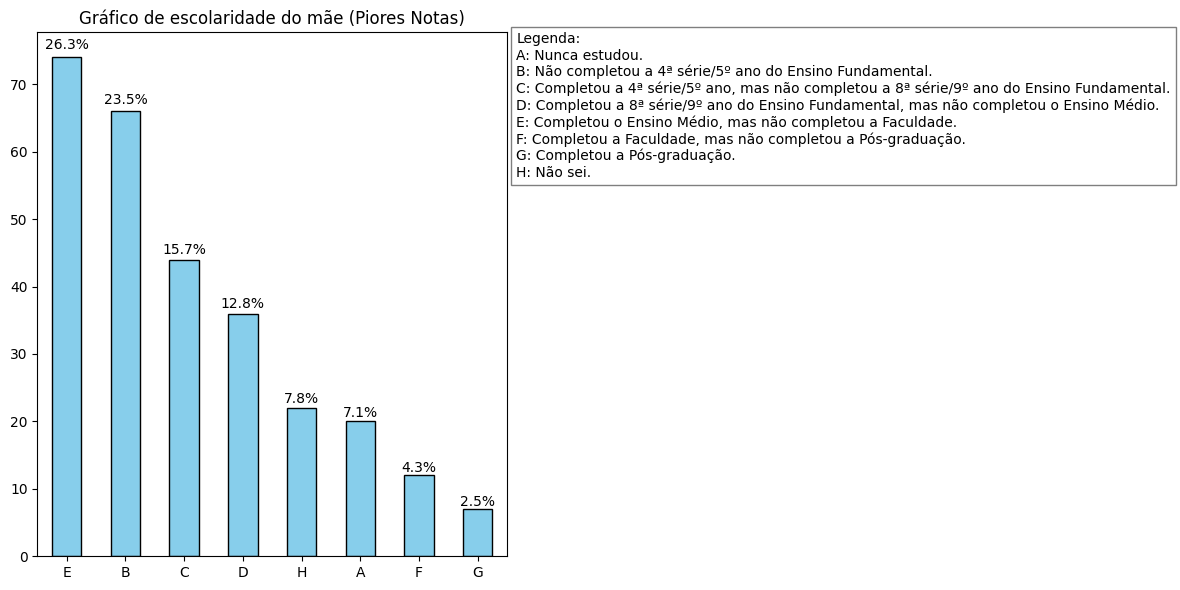

In [57]:
# Calcula a porcentagem de cada valor em relação ao total
contagem_q001 = piores_notas['Q002'].value_counts()
total_q001 = contagem_q001.sum()
porcentagens_q001 = [(valor / total_q001) * 100 for valor in contagem_q001]

# Configuração do gráfico de barras
plt.figure(figsize=(12, 6))  # Ajusta o tamanho da figura (opcional)
bars_q001 = contagem_q001.plot(kind='bar', color='skyblue', edgecolor='black')  # Plota o gráfico de barras

# Adiciona os valores em porcentagem nos rótulos das barras
for i, percentual in enumerate(porcentagens_q001):
    plt.text(i, contagem_q001.iloc[i] + contagem_q001.iloc[i]*0.01, f'{percentual:.1f}%', ha='center', va='bottom')

# Configurações da legenda como bloco
legenda_texto_q001 = '\n'.join([f'{codigo}: {descricao}' for codigo, descricao in descricoes_q001.items()])
plt.text(1.02, 1.00, f'Legenda:\n{legenda_texto_q001}', transform=plt.gca().transAxes, fontsize=10, va='top', bbox=dict(facecolor='white', alpha=0.5))

# Configurações adicionais
plt.title('Gráfico de escolaridade do mãe (Piores Notas)')
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation=0)  # Rótulos do eixo x na horizontal

# Exibe o gráfico de barras
plt.tight_layout()
plt.show()